In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0          0        109             0.0             0.0             0.0   
1          1        109             0.0             0.0             0.0   
2          2        109             0.0             0.0             0.0   
3          3        109             0.0             0.0             0.0   
4          4        109             0.0             0.0             0.0   
...      ...        ...             ...             ...             ...   
69994  69994        109             0.0             0.0             0.0   
69995  69995        109             0.0             0.0             0.0   
69996  69996        109             0.0             0.0             0.0   
69997  69997        109             0.0             0.0             0.0   
69998  69998        109             0.0             0.0             0.0   

      last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0                6/30/2014            7/31/2014            8/31/2014   31.277   
1                6/30/2014            7/31/2014            8/31/2014    0.000   
2                6/30/2014            7/31/2014            8/31/2014   60.806   
3                6/30/2014            7/31/2014            8/31/2014  156.362   
4                6/30/2014            7/31/2014            8/31/2014  240.708   
...                    ...                  ...                  ...      ...   
69994            6/30/2014            7/31/2014            8/31/2014   15.760   
69995            6/30/2014            7/31/2014            8/31/2014  160.083   
69996            6/30/2014            7/31/2014            8/31/2014  372.088   
69997            6/30/2014            7/31/2014            8/31/2014  238.575   
69998            6/30/2014            7/31/2014            8/31/2014  168.269   

        arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  \
0       87.009  ...            0            0        NaN        NaN   
1      122.787  ...            0            0        NaN        1.0   
2      103.176  ...            0            0        NaN        NaN   
3      205.260  ...            0            0        NaN        NaN   
4      128.191  ...            1            0        1.0        1.0   
...        ...  ...          ...          ...        ...        ...   
69994  410.924  ...            1            0        NaN        1.0   
69995  289.129  ...            0            0        NaN        NaN   
69996  258.374  ...            0            0        NaN        NaN   
69997  245.414  ...            0            0        1.0        1.0   
69998   42.815  ...            0            0        1.0        NaN   

       fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0            NaN  1958        0.00        0.00        0.00                  0  
1            NaN   710        0.00        0.00        0.00                  0  
2            NaN   882        0.00        0.00        0.00                  0  
3            NaN   982        0.00        0.00        0.00                  0  
4            1.0   647        0.00        0.00        0.00                  0  
...          ...   ...         ...         ...         ...                ...  
69994        1.0   221        0.00        0.00        0.00                  0  
69995        NaN   712        0.00        0.00        0.00                  0  
69996        NaN   879        0.00        0.00        0.00                  0  
69997        1.0   277      664.25     1402.96      990.97                  0  
69998        1.0  1876        0.00        0.00        0.00                  0  

[69999 rows x 172 columns]

In [3]:
df.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [4]:
#Calculating the percentage of missing df for each column in the dataframe'df' and creating a dictionary with column names as keys
missing_df_percentage = dict(df.isna().sum()/len(df)*100)
missing_df_percentage

{'id': 0.0,
 'circle_id': 0.0,
 'loc_og_t2o_mou': 1.0028714695924228,
 'std_og_t2o_mou': 1.0028714695924228,
 'loc_ic_t2o_mou': 1.0028714695924228,
 'last_date_of_month_6': 0.0,
 'last_date_of_month_7': 0.570008142973471,
 'last_date_of_month_8': 1.0471578165402362,
 'arpu_6': 0.0,
 'arpu_7': 0.0,
 'arpu_8': 0.0,
 'onnet_mou_6': 3.954342204888641,
 'onnet_mou_7': 3.8386262660895154,
 'onnet_mou_8': 5.2900755725081785,
 'offnet_mou_6': 3.954342204888641,
 'offnet_mou_7': 3.8386262660895154,
 'offnet_mou_8': 5.2900755725081785,
 'roam_ic_mou_6': 3.954342204888641,
 'roam_ic_mou_7': 3.8386262660895154,
 'roam_ic_mou_8': 5.2900755725081785,
 'roam_og_mou_6': 3.954342204888641,
 'roam_og_mou_7': 3.8386262660895154,
 'roam_og_mou_8': 5.2900755725081785,
 'loc_og_t2t_mou_6': 3.954342204888641,
 'loc_og_t2t_mou_7': 3.8386262660895154,
 'loc_og_t2t_mou_8': 5.2900755725081785,
 'loc_og_t2m_mou_6': 3.954342204888641,
 'loc_og_t2m_mou_7': 3.8386262660895154,
 'loc_og_t2m_mou_8': 5.2900755725081785

In [5]:
df.describe(percentiles = [.25, .5, .75, .90, .95, .99])

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
90%    62998.200000      109.0             0.0             0.0   
95%    66498.100000      109.0             0.0             0.0   
99%    69298.020000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
90%               0.0    619.993800    615.661400    614.994600    345.080000   
95%               0.0    832.022700    823.236700    828.464700    617.185000   
99%               0.0   1400.276640   1414.891380   1445.054800   1447.098000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7  ...   sachet_3g_7   sachet_3g_8     fb_user_6  \
count  67312.000000  ...  69999.000000  69999.000000  17568.000000   
mean     133.894438  ...      0.081444      0.085487      0.916325   
std      311.277193  ...      0.634547      0.680035      0.276907   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        6.675000  ...      0.000000      0.000000      1.000000   
50%       32.280000  ...      0.000000      0.000000      1.000000   
75%      115.837500  ...      0.000000      0.000000      1.000000   
90%      347.908000  ...      0.000000      0.000000      1.000000   
95%      628.437500  ...      0.000000      0.000000      1.000000   
99%     1478.540900  ...      2.000000      2.000000      1.000000   
max     8157.780000  ...     33.000000     41.000000      1.000000   

          fb_user_7     fb_user_8           aon    aug_vbc_3g    jul_vbc_3g  \
count  17865.000000  18417.000000  69999.000000  69999.000000  69999.000000   
mean       0.909544      0.890319   1220.639709     68.108597     65.935830   
std        0.286842      0.312501    952.426321    269.328659    267.899034   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    468.000000      0.000000      0.000000   
50%        1.000000      1.000000    868.000000      0.000000      0.000000   
75%        1.000000      1.000000   1813.000000      0.000000      0.000000   
90%        1.000000      1.000000   2792.000000    160.444000    136.272000   
95%        1.000000      1.000000   3108.000000    464.277000    446.353000   
99%        1.000000      1.000000   3651.000000   1226.659800   1254.279000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

        jun_vbc_3g  churn_probability  
count  69999.00000       69999.000000  
mean      60.07674           0.101887  
std      257.22681           0.302502  
min        0.00000           0.000000  
25%        0.00000           0.000000  
50%        0.00000           0.000000  
75%        0.00000           0.000000  
90%      110.32800           1.000000  
95%      400.13400           1.000000  
99%     1188.26780           1.000000  
max    11166.21000   

In [6]:
from sklearn.impute import SimpleImputer

In [7]:
df.dtypes.value_counts()

float64    135
int64       28
object       9
Name: count, dtype: int64

In [8]:
num_variables = [col for col in df.columns if df[col].dtype!='0']
num_variables

['id',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 

In [9]:
recharge_cols = [col for col in df.columns if 'rech' in col and col in num_variables]

imputer = SimpleImputer(strategy='constant', fill_value=0)

df[recharge_cols] = imputer.fit_transform(df[recharge_cols])

df[recharge_cols].isna().sum()*100/len(df)

total_rech_num_6            0.0
total_rech_num_7            0.0
total_rech_num_8            0.0
total_rech_amt_6            0.0
total_rech_amt_7            0.0
total_rech_amt_8            0.0
max_rech_amt_6              0.0
max_rech_amt_7              0.0
max_rech_amt_8              0.0
date_of_last_rech_6         0.0
date_of_last_rech_7         0.0
date_of_last_rech_8         0.0
date_of_last_rech_data_6    0.0
date_of_last_rech_data_7    0.0
date_of_last_rech_data_8    0.0
total_rech_data_6           0.0
total_rech_data_7           0.0
total_rech_data_8           0.0
max_rech_data_6             0.0
max_rech_data_7             0.0
max_rech_data_8             0.0
count_rech_2g_6             0.0
count_rech_2g_7             0.0
count_rech_2g_8             0.0
count_rech_3g_6             0.0
count_rech_3g_7             0.0
count_rech_3g_8             0.0
av_rech_amt_data_6          0.0
av_rech_amt_data_7          0.0
av_rech_amt_data_8          0.0
dtype: float64

In [10]:
flag_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
df[flag_cols] = imputer.fit_transform(df[flag_cols])
df[flag_cols].isna().sum()*100/len(df)

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64

In [11]:
isna_data =pd.DataFrame(df.isna().sum()/len(df)*100)
isna_data = isna_data.sort_values(by=0,ascending=False)
isna_data = isna_data.reset_index()
isna_data.columns = ['feature', 'percentage']
isna_data

feature  percentage
0              arpu_3g_6   74.902499
1              arpu_2g_6   74.902499
2              arpu_3g_7   74.478207
3              arpu_2g_7   74.478207
4              arpu_3g_8   73.689624
..                   ...         ...
167   last_day_rch_amt_7    0.000000
168   last_day_rch_amt_6    0.000000
169  date_of_last_rech_8    0.000000
170  date_of_last_rech_7    0.000000
171    churn_probability    0.000000

[172 rows x 2 columns]

In [12]:
relevent_columns_data = isna_data[isna_data['percentage']<30]

relevent_columns_data

imp_columns = list(relevent_columns_data['feature'])

df_refined_1 = df[imp_columns]

pd.DataFrame(df_refined_1.isna().sum()/len(df)*100).shape

(166, 1)

In [13]:
df_variables = ['date_of_last_rech_8','date_of_last_rech_7', 'date_of_last_rech_6', 'last_date_of_month_8', 'last_date_of_month_7','last_date_of_month_6']

In [14]:
length = len(df_variables)
for i in range(length):
    string = 'day_from_' + df_variables[i]
    df_refined_1[string] = pd.DatetimeIndex(df_refined_1[df_variables[i]]).day
    df_variables.append(string)

In [15]:
df_variables

['date_of_last_rech_8',
 'date_of_last_rech_7',
 'date_of_last_rech_6',
 'last_date_of_month_8',
 'last_date_of_month_7',
 'last_date_of_month_6',
 'day_from_date_of_last_rech_8',
 'day_from_date_of_last_rech_7',
 'day_from_date_of_last_rech_6',
 'day_from_last_date_of_month_8',
 'day_from_last_date_of_month_7',
 'day_from_last_date_of_month_6']

In [16]:
# Calculating the difference between the last date of recharge and the last date of the month to derive recency for month 6
df_refined_1["days_since_rechg_6"] = (df_refined_1["day_from_last_date_of_month_6"] - df_refined_1["day_from_date_of_last_rech_6"]) + 1
# Appending the derived feature to 'df_variables'
df_variables.append('days_since_rechg_6')

# Calculating the difference between the last date of recharge and the last date of the month to derive recency for month 7
df_refined_1["days_since_rechg_7"] = (df_refined_1["day_from_last_date_of_month_7"] - df_refined_1["day_from_date_of_last_rech_7"]) + 1
# Appending the derived feature to 'df_variables'
df_variables.append('days_since_rechg_7')

# Calculating the difference between the last date of recharge and the last date of the month to derive recency for month 8
df_refined_1["days_since_rechg_8"] = (df_refined_1["day_from_last_date_of_month_8"] - df_refined_1["day_from_date_of_last_rech_8"]) + 1
# Appending the derived feature to 'df_variables'
df_variables.append('days_since_rechg_8')

# Deriving presence or absence of the last date of the month columns for month 6
df_refined_1["month_present_6"] = (df_refined_1["day_from_last_date_of_month_6"] - df_refined_1["day_from_last_date_of_month_6"]) + 1
# Appending the derived feature to 'df_variables'
df_variables.append('month_present_6')

# Deriving presence or absence of the last date of the month columns for month 7
df_refined_1["month_present_7"] = (df_refined_1["day_from_last_date_of_month_7"] - df_refined_1["day_from_last_date_of_month_7"]) + 1
# Appending the derived feature to 'df_variables'
df_variables.append('month_present_7')

# Deriving presence or absence of the last date of the month columns for month 8
df_refined_1["month_present_8"] = (df_refined_1["day_from_last_date_of_month_8"] - df_refined_1["day_from_last_date_of_month_8"]) + 1
# Appending the derived feature to 'df_variables'
df_variables.append('month_present_8')

In [17]:
# Creating a DataFrame to show the percentage of missing values in selected columns of 'df_refined_1'
pd.DataFrame(df_refined_1[df_variables].isna().sum() / len(df) * 100)

0
date_of_last_rech_8            0.000000
date_of_last_rech_7            0.000000
date_of_last_rech_6            0.000000
last_date_of_month_8           1.047158
last_date_of_month_7           0.570008
last_date_of_month_6           0.000000
day_from_date_of_last_rech_8   0.000000
day_from_date_of_last_rech_7   0.000000
day_from_date_of_last_rech_6   0.000000
day_from_last_date_of_month_8  1.047158
day_from_last_date_of_month_7  0.570008
day_from_last_date_of_month_6  0.000000
days_since_rechg_6             0.000000
days_since_rechg_7             0.570008
days_since_rechg_8             1.047158
month_present_6                0.000000
month_present_7                0.570008
month_present_8                1.047158

In [18]:
df_refined_1[df_variables].describe(percentiles=[.25, .5, .75, .90, .95, .99])


day_from_date_of_last_rech_8  day_from_date_of_last_rech_7  \
count                  69999.000000                  69999.000000   
mean                      24.582665                     25.073701   
std                        7.500762                      6.561867   
min                        1.000000                      1.000000   
25%                       24.000000                     22.000000   
50%                       27.000000                     27.000000   
75%                       30.000000                     30.000000   
90%                       31.000000                     31.000000   
95%                       31.000000                     31.000000   
99%                       31.000000                     31.000000   
max                       31.000000                     31.000000   

       day_from_date_of_last_rech_6  day_from_last_date_of_month_8  \
count                  69999.000000                        69266.0   
mean                      23.764354                           31.0   
std                        6.732366                            0.0   
min                        1.000000                           31.0   
25%                       20.000000                           31.0   
50%                       27.000000                           31.0   
75%                       29.000000                           31.0   
90%                       30.000000                           31.0   
95%                       30.000000                           31.0   
99%                       30.000000                           31.0   
max                       30.000000                           31.0   

       day_from_last_date_of_month_7  day_from_last_date_of_month_6  \
count                        69600.0                        69999.0   
mean                            31.0                           30.0   
std                              0.0                            0.0   
min                             31.0                           30.0   
25%                             31.0                           30.0   
50%                             31.0                           30.0   
75%                             31.0                           30.0   
90%                             31.0                           30.0   
95%                             31.0                           30.0   
99%                             31.0                           30.0   
max                             31.0                           30.0   

       days_since_rechg_6  days_since_rechg_7  days_since_rechg_8  \
count        69999.000000        69600.000000        69266.000000   
mean             7.235646            6.788290            7.167774   
std              6.732366            6.321667            7.135064   
min              1.000000            1.000000            1.000000   
25%              2.000000            2.000000            2.000000   
50%              4.000000            5.000000            5.000000   
75%             11.000000            9.000000            8.000000   
90%             17.000000           16.000000           18.000000   
95%             19.000000           20.000000           25.000000   
99%             30.000000           31.000000           31.000000   
max             30.000000           31.000000           31.000000   

       month_present_6  month_present_7  month_present_8  
count          69999.0          69600.0          69266.0  
mean               1.0              1.0              1.0  
std                0.0              0.0              0.0  
min                1.0              1.0              1.0  
25%                1.0              1.0              1.0  
50%                1.0              1.0              1.0  
75%                1.0              1.0              1.0  
90%                1.0              1.0              1.0  
95%                1.0              1.0              1.0  
99%                1.0              1.0              1.0  
max   

In [19]:
# List of columns to be dropped from 'df_refined_1'
df_drop_variables = ['date_of_last_rech_8',
                     'date_of_last_rech_7',
                     'date_of_last_rech_6',
                     'last_date_of_month_8',
                     'last_date_of_month_7',
                     'last_date_of_month_6',
                     'day_from_date_of_last_rech_8',
                     'day_from_date_of_last_rech_7',
                     'day_from_date_of_last_rech_6',
                     'day_from_last_date_of_month_8',
                     'day_from_last_date_of_month_7',
                     'day_from_last_date_of_month_6']

# Dropping specified columns from 'df_refined_1'
df_refined_1 = df_refined_1.drop(df_drop_variables, axis=1)

In [20]:
df_variables

['date_of_last_rech_8',
 'date_of_last_rech_7',
 'date_of_last_rech_6',
 'last_date_of_month_8',
 'last_date_of_month_7',
 'last_date_of_month_6',
 'day_from_date_of_last_rech_8',
 'day_from_date_of_last_rech_7',
 'day_from_date_of_last_rech_6',
 'day_from_last_date_of_month_8',
 'day_from_last_date_of_month_7',
 'day_from_last_date_of_month_6',
 'days_since_rechg_6',
 'days_since_rechg_7',
 'days_since_rechg_8',
 'month_present_6',
 'month_present_7',
 'month_present_8']

In [21]:
# Columns to be imputed with 0 where minimum value is always 1
days_col_impute = ['days_since_rechg_6',
                   'days_since_rechg_7',
                   'days_since_rechg_8',
                   'month_present_6',
                   'month_present_7',
                   'month_present_8']


# Imputing null values with 0 for the specified columns in 'df_refined_1'
df_refined_1[days_col_impute] = df_refined_1[days_col_impute].apply(lambda x: x.fillna(0))

In [22]:
cols_to_impute = []
for col in df_refined_1.select_dtypes(include=['float64', 'int64']).columns:
    if df_refined_1[col].isnull().any():
        cols_to_impute.append(col)

df_refined_1[cols_to_impute] = df_refined_1[cols_to_impute].apply(lambda x: x.fillna(0))

In [23]:
# Checking for duplicated rows in DataFrame 'df_refined_1'
df_refined_1.duplicated().any().sum()

0

In [24]:
pd.DataFrame(df_refined_1[df_refined_1.columns].isna().sum()/len(df)*100)

0
loc_og_t2t_mou_8    0.0
loc_ic_t2t_mou_8    0.0
loc_ic_mou_8        0.0
loc_og_t2f_mou_8    0.0
loc_ic_t2f_mou_8    0.0
...                 ...
days_since_rechg_7  0.0
days_since_rechg_8  0.0
month_present_6     0.0
month_present_7     0.0
month_present_8     0.0

[166 rows x 1 columns]

Delete unique values columns

In [25]:
# Delete unique values columns
# Creating a DataFrame 'unq_check' to count the number of unique values in each column of 'df_refined_1'
unq_check = pd.DataFrame(df_refined_1.nunique())

# Extracting column names with only one unique value
single_value_cols = list(unq_check[unq_check[0] == 1].index)

# Dropping columns with only one unique value from 'df_refined_1'
df_refined_1 = df_refined_1.drop(single_value_cols, axis=1)

In [26]:
# Descriptive statistics for selected columns in 'df_refined_1' where churn_probability equals 1
df_refined_1[df_refined_1['churn_probability'] == 1][['arpu_6', 'arpu_7', 'arpu_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']].describe()

arpu_6       arpu_7       arpu_8  total_og_mou_6  total_og_mou_7  \
count   7132.000000  7132.000000  7132.000000     7132.000000     7132.000000   
mean     308.289067   219.081400   114.226380      352.370766      242.877399   
std      385.723588   321.495315   245.585045      568.126782      495.704991   
min     -209.465000  -158.963000  -155.236000        0.000000        0.000000   
25%       96.093500    14.745250     0.000000        2.130000        0.000000   
50%      210.676500   118.348000     9.969500      138.910000       38.790000   
75%      409.335750   289.543500   137.013250      458.530000      261.810000   
max    11505.508000  6876.324000  5731.327000     8488.360000     8285.640000   

       total_og_mou_8  
count     7132.000000  
mean        92.624937  
std        289.593054  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%         35.275000  
max       5206.210000

In [27]:
# Calculating the difference in total recharge amount between month 6 and month 8
df_refined_1['rech_diff_6_8'] = df_refined_1['total_rech_amt_8'] - df_refined_1['total_rech_amt_6']

# Calculating the difference in average revenue per user (ARPU) between month 6 and month 8
df_refined_1['arpu_diff_6_8'] = df_refined_1['arpu_8'] - df_refined_1['arpu_6']

# Calculating the difference in total outgoing minutes of usage (OG mou) between month 6 and month 8
df_refined_1['og_mou_diff_6_8'] = df_refined_1['total_og_mou_8'] - df_refined_1['total_og_mou_6']

EDA

In [28]:
# Importing regular expression module
import re

# Categorizing key columns with respective variables based on column names
total_amounts = [i for i in list(df_refined_1.columns) if re.search('total.+amt',i)]
total_outgoing_minutes = [i for i in list(df_refined_1.columns) if re.search('total.+og.+mou',i)]
total_incoming_minutes = [i for i in list(df_refined_1.columns) if re.search('total.+ic.+mou',i)]
offnetwork_minutes = [i for i in list(df_refined_1.columns) if re.search('offnet',i)]
volume_3g = [i for i in list(df_refined_1.columns) if re.search('vol.+3g',i)]
volume_2g = [i for i in list(df_refined_1.columns) if re.search('vol.+2g',i)]
age_on_network = [i for i in list(df_refined_1.columns) if re.search('aon',i)]

# Storing the categorized variables in a single flat list
variables = ['id',
             *total_amounts,
             *total_incoming_minutes,
             *total_outgoing_minutes,
             *offnetwork_minutes,
             *volume_3g,
             *volume_2g,
             *age_on_network,
             'arpu_6', 'arpu_7', 'arpu_8',
             'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
             'rech_diff_6_8', 'arpu_diff_6_8', 'og_mou_diff_6_8',
             'churn_probability']

# Creating a trimmed DataFrame for Exploratory Data Analysis (EDA) with selected variables and setting 'id' as index
trim_df_for_EDA = df_refined_1[variables].set_index('id')

In [29]:
# Displaying the trimmed DataFrame for Exploratory Data Analysis (EDA)
trim_df_for_EDA

total_rech_amt_8  total_rech_amt_7  total_rech_amt_6  total_ic_mou_8  \
id                                                                            
0                    10                65                77           40.56   
1                    50               145                 0           25.04   
2                     0               120                70           36.64   
3                   130               240               160           83.84   
4                   122               136               290           28.31   
...                 ...               ...               ...             ...   
69994               512               397                50          269.56   
69995               308               313               200          136.01   
69996               397               250               626          414.54   
69997               145               252               379           17.76   
69998               198                50               198           33.58   

       total_ic_mou_7  total_ic_mou_6  total_og_mou_8  total_og_mou_7  \
id                                                                      
0               53.04           11.84            3.63          221.68   
1               39.44            3.44           31.66           30.73   
2               33.83          124.29            0.00           99.36   
3               50.18           95.11           53.84           95.98   
4                9.36           21.54           15.76           42.94   
...               ...             ...             ...             ...   
69994          221.99            0.00          392.58          496.68   
69995          112.43           80.24          280.69          292.74   
69996          416.58          542.18          342.29          296.39   
69997           16.24           18.83           19.28           24.33   
69998           65.09            8.13            0.00            0.00   

       total_og_mou_6  offnet_mou_8  ...   arpu_6   arpu_7   arpu_8  \
id                                   ...                              
0               81.21          2.33  ...   31.277   87.009    7.527   
1                0.00         30.89  ...    0.000  122.787   42.953   
2               56.49          0.00  ...   60.806  103.176    0.000   
3               76.03         50.23  ...  156.362  205.260  111.095   
4               63.26          9.63  ...  240.708  128.191  101.565   
...               ...           ...  ...      ...      ...      ...   
69994            0.00        381.64  ...   15.760  410.924  329.136   
69995          166.21         48.06  ...  160.083  289.129  265.772   
69996          412.68        263.84  ...  372.088  258.374  279.782   
69997           39.78         12.56  ...  238.575  245.414  145.062   
69998            0.00          0.00  ...  168.269   42.815  167.961   

       total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  rech_diff_6_8  \
id                                                                           
0                    77                65                10            -67   
1                     0               145                50             50   
2                    70               120                 0            -70   
3                   160               240               130            -30   
4                   290               136               122           -168   
...                 ...               ...               ...            ...   
69994                50               397               512            462   
69995               200               313               308            108   
69996               626               250               397           -229   
69997               379               252               145           -234   
69998               198                50               198              0   

       arpu_diff_6_8  og_mou_diff_6_8  churn_probability  
id                             

In [30]:
# Selecting numerical columns from the trimmed DataFrame for analysis
numeric_cols = trim_df_for_EDA.select_dtypes(include=['float64', 'int64']).columns
# Defining categorical columns for analysis
categorical_cols = flag_cols + ['month_present_7', 'month_present_8']
# Displaying the list of categorical columns
categorical_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'month_present_7',
 'month_present_8']

Column: total_ic_mou_8, Missing Data: 0.00%


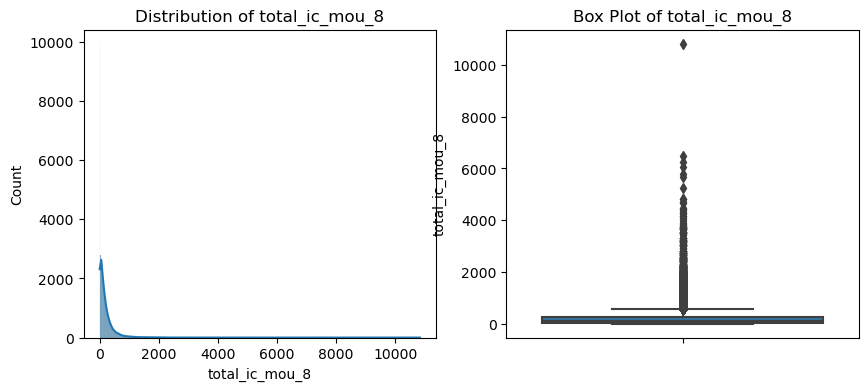

Column: total_ic_mou_7, Missing Data: 0.00%


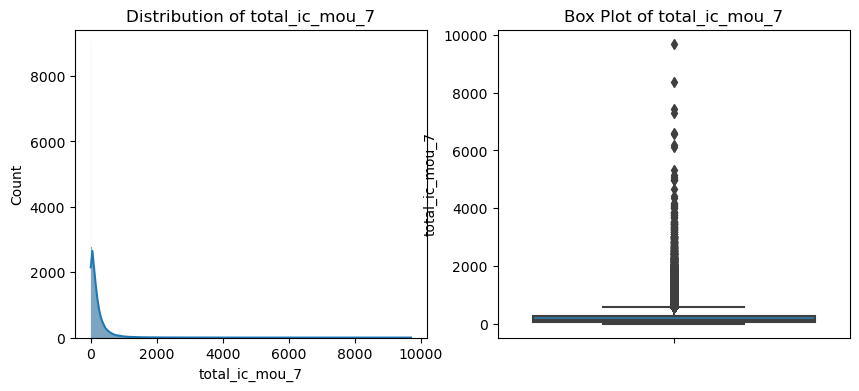

Column: total_ic_mou_6, Missing Data: 0.00%


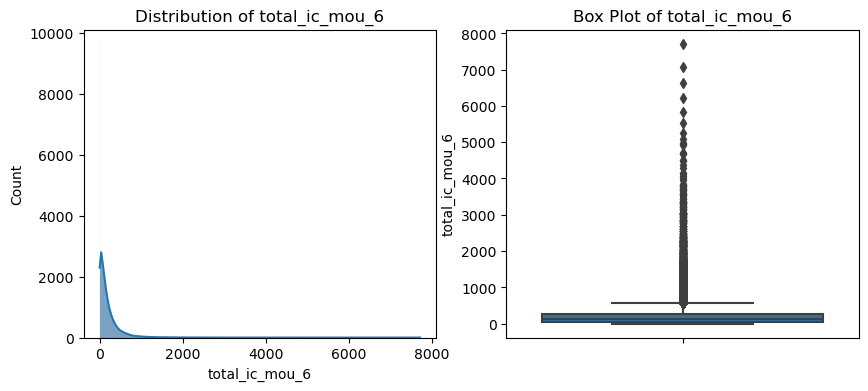

Column: total_og_mou_8, Missing Data: 0.00%


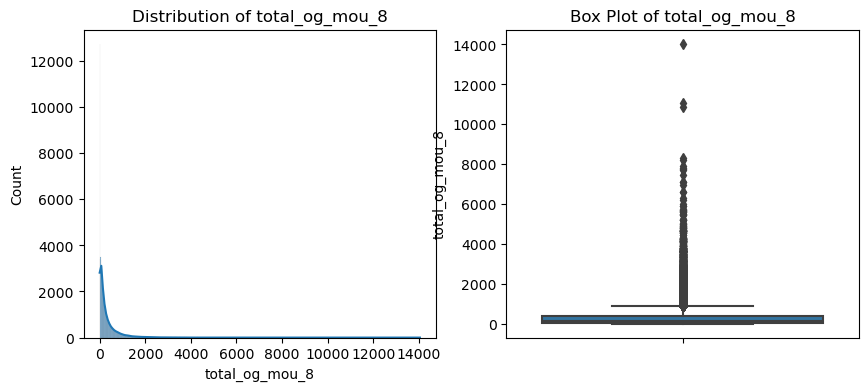

Column: total_og_mou_7, Missing Data: 0.00%


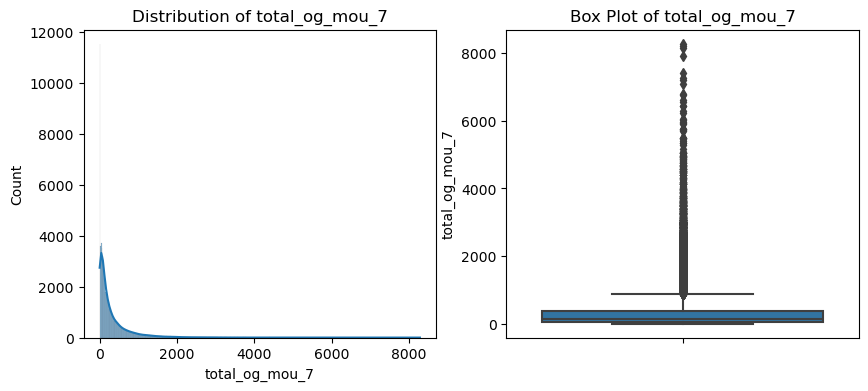

Column: total_og_mou_6, Missing Data: 0.00%


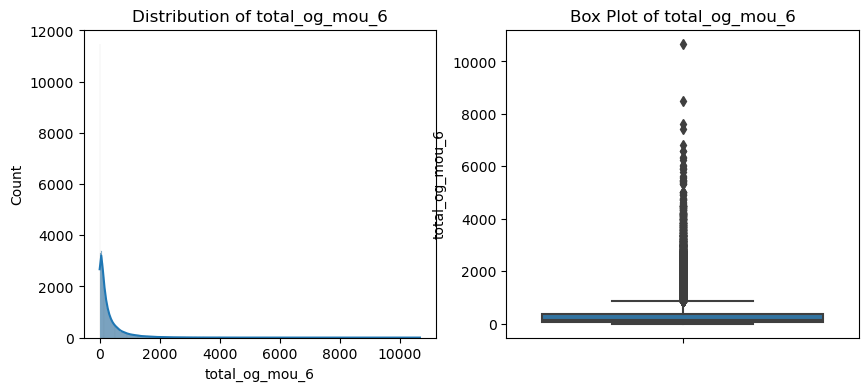

Column: offnet_mou_8, Missing Data: 0.00%


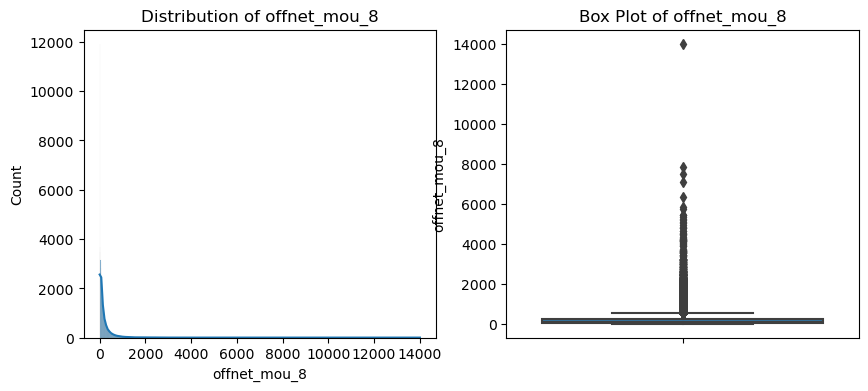

Column: offnet_mou_6, Missing Data: 0.00%


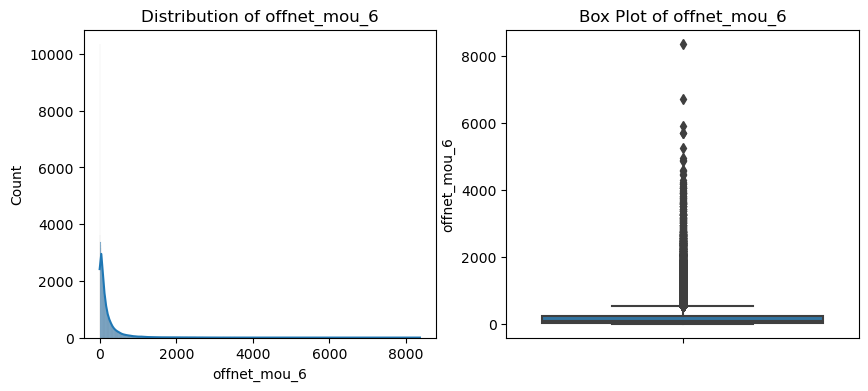

Column: offnet_mou_7, Missing Data: 0.00%


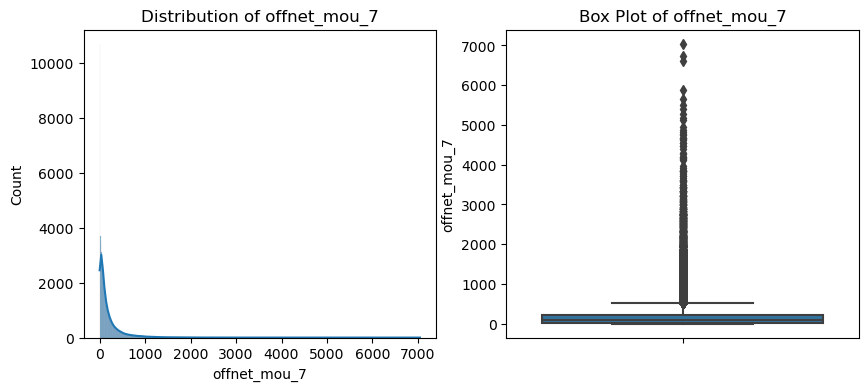

Column: vol_3g_mb_8, Missing Data: 0.00%


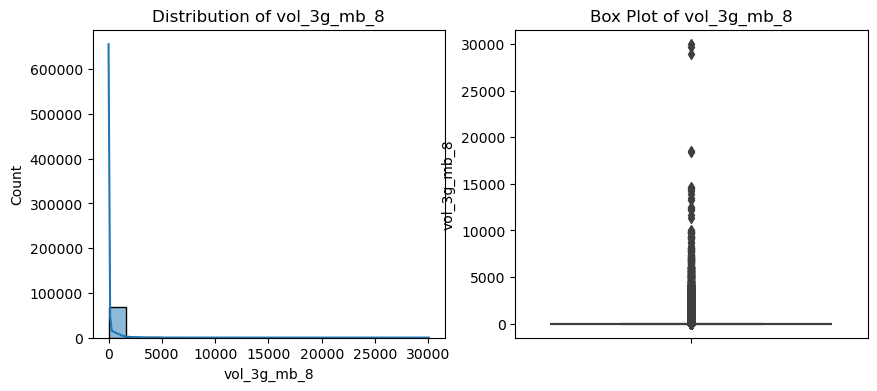

Column: vol_3g_mb_7, Missing Data: 0.00%


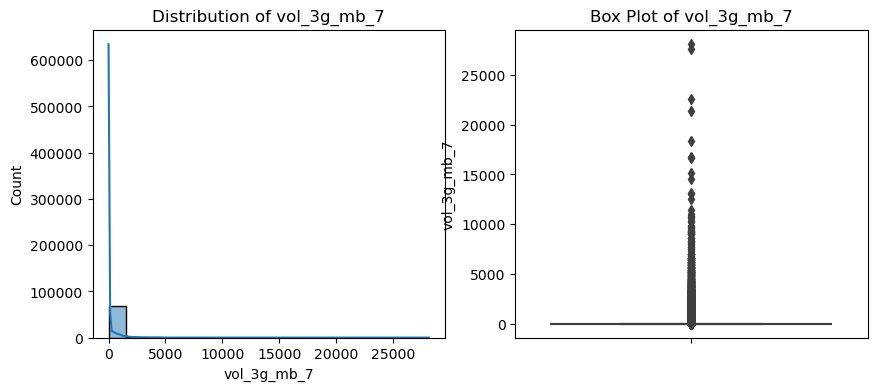

Column: vol_3g_mb_6, Missing Data: 0.00%


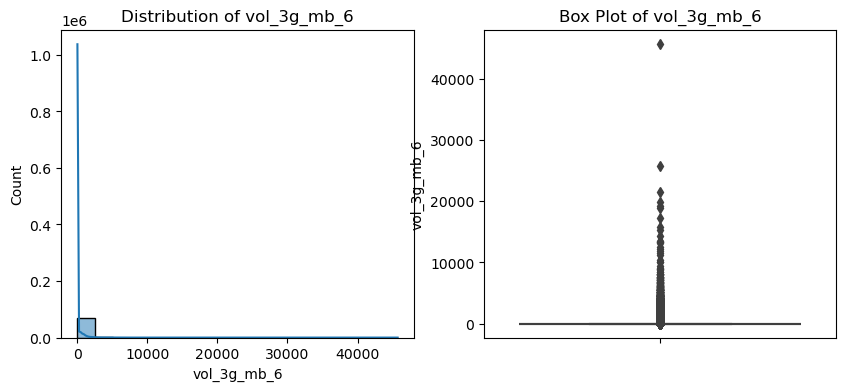

Column: vol_2g_mb_8, Missing Data: 0.00%


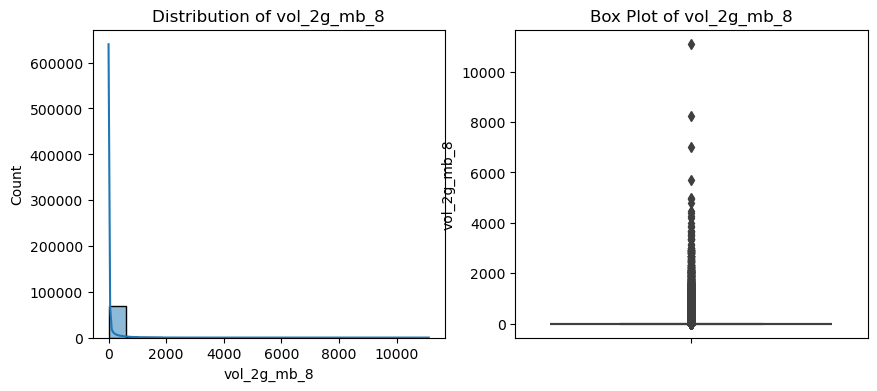

Column: vol_2g_mb_7, Missing Data: 0.00%


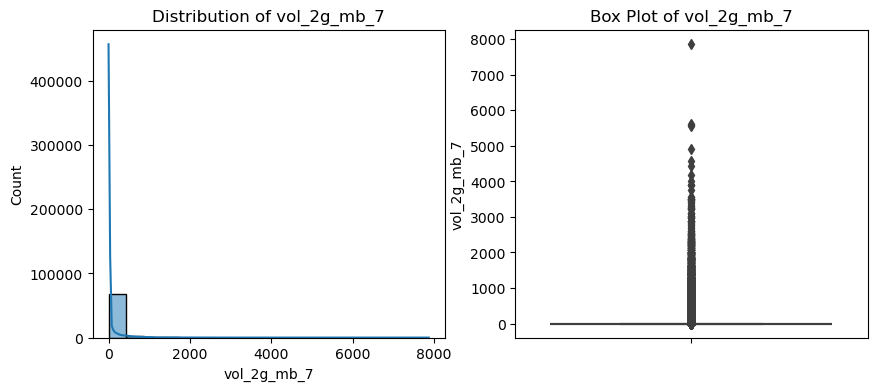

Column: vol_2g_mb_6, Missing Data: 0.00%


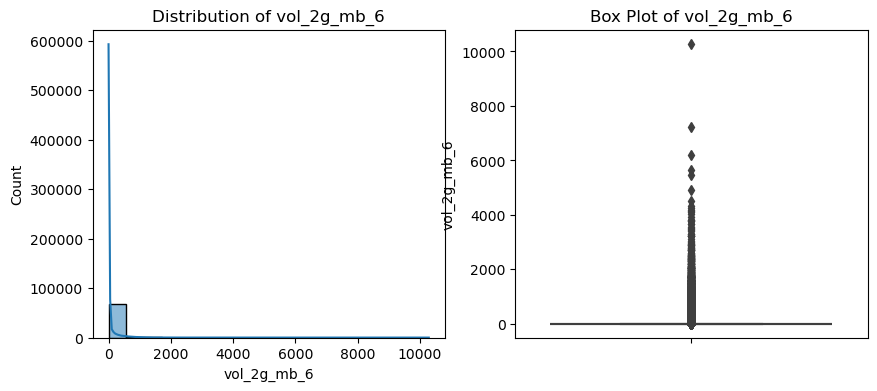

Column: aon, Missing Data: 0.00%


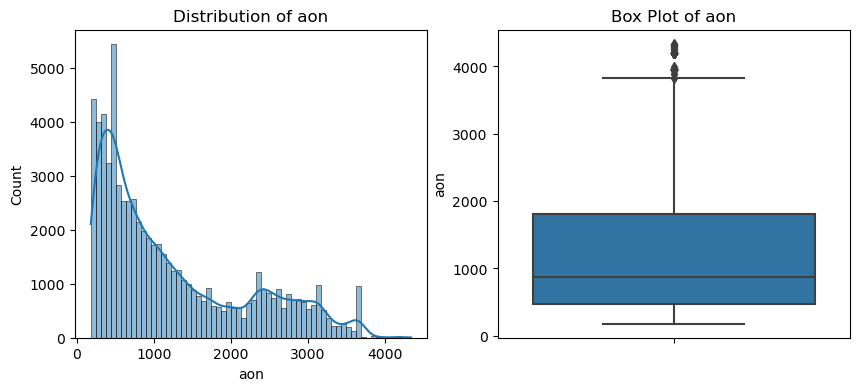

Column: arpu_6, Missing Data: 0.00%


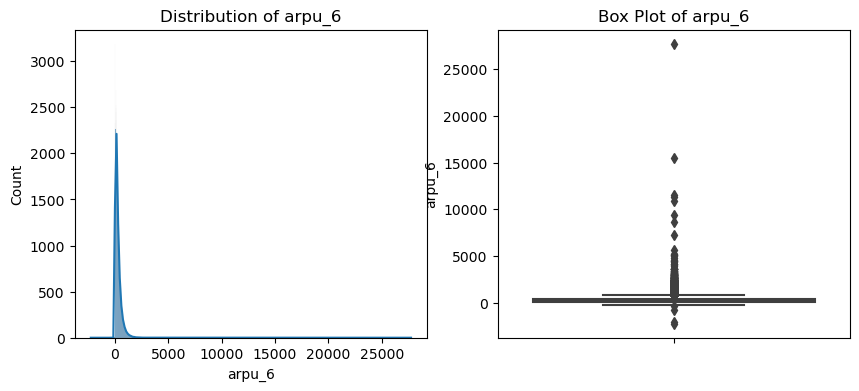

Column: arpu_7, Missing Data: 0.00%


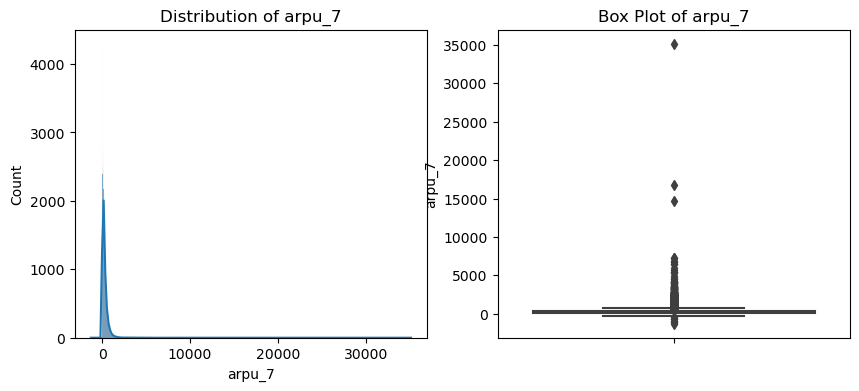

Column: arpu_8, Missing Data: 0.00%


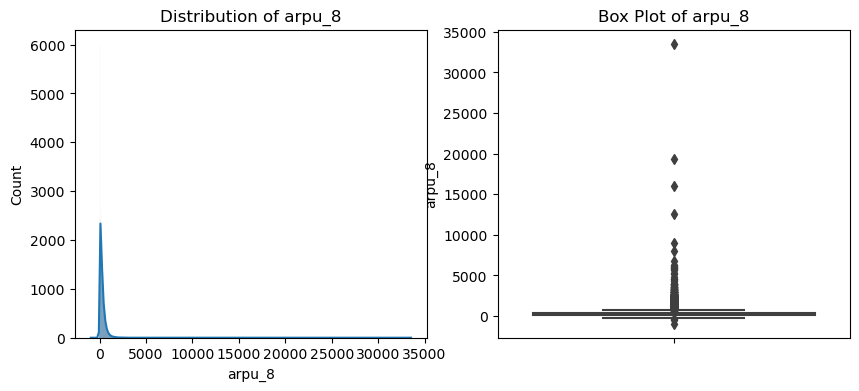

Column: arpu_diff_6_8, Missing Data: 0.00%


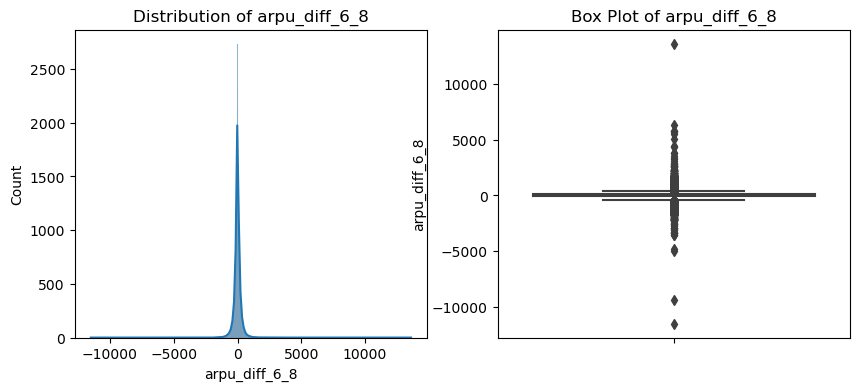

Column: og_mou_diff_6_8, Missing Data: 0.00%


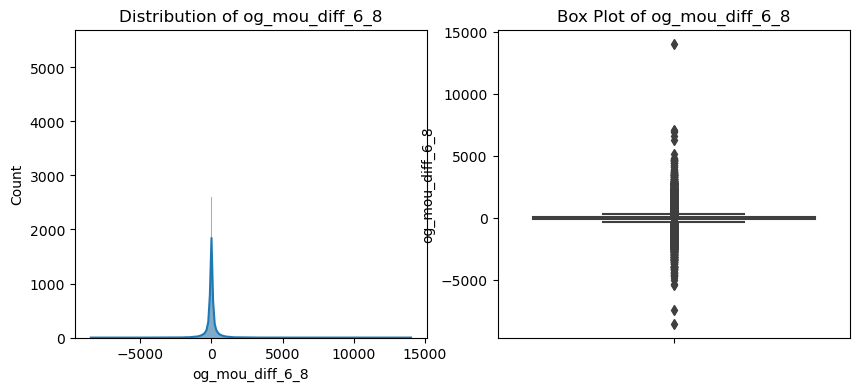

Column: churn_probability, Missing Data: 0.00%


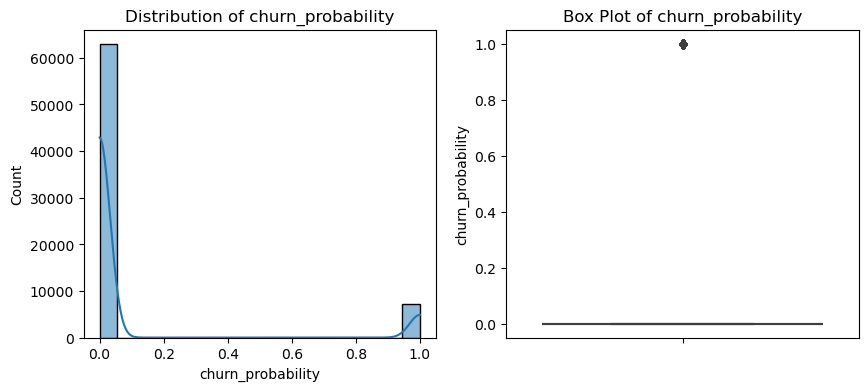

Column: night_pck_user_6, Missing Data: 0.00%


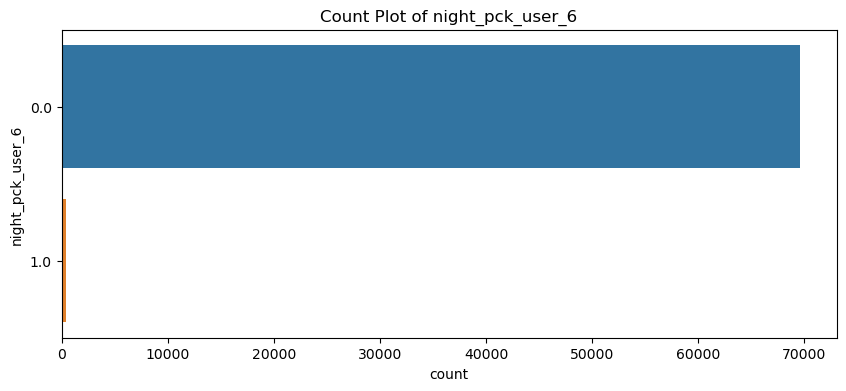

Column: night_pck_user_7, Missing Data: 0.00%


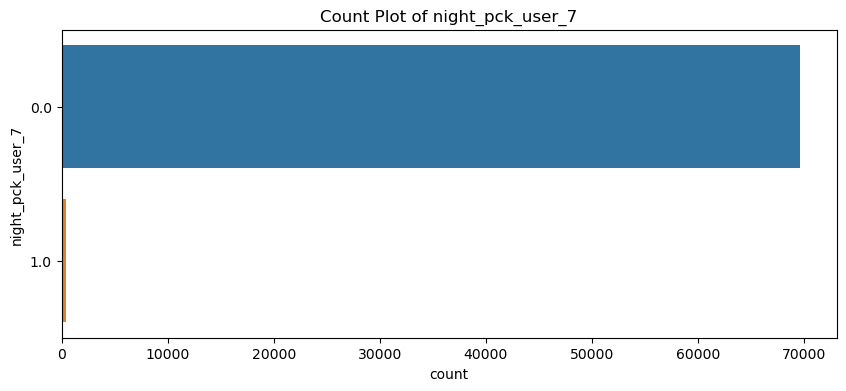

Column: night_pck_user_8, Missing Data: 0.00%


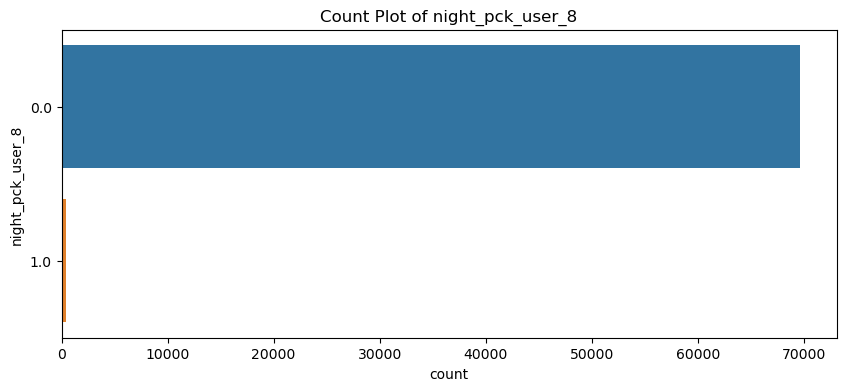

Column: fb_user_6, Missing Data: 0.00%


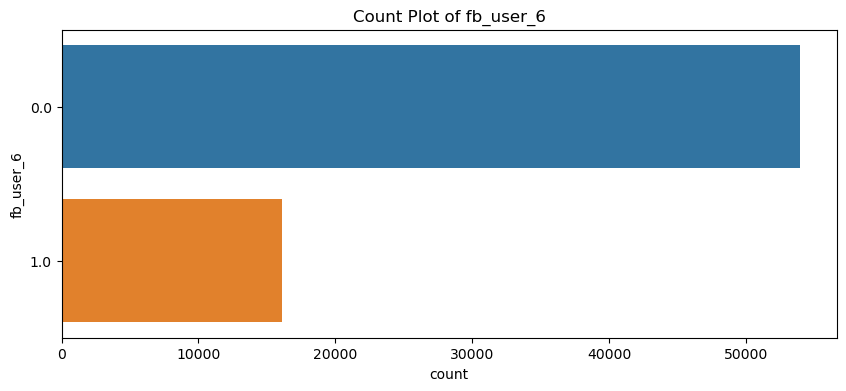

Column: fb_user_7, Missing Data: 0.00%


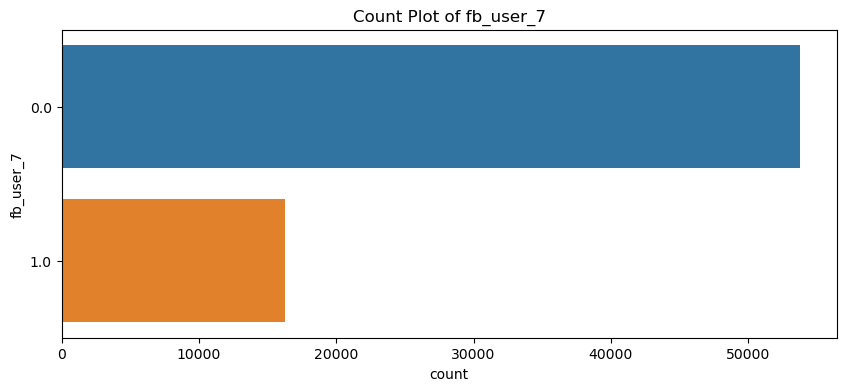

Column: fb_user_8, Missing Data: 0.00%


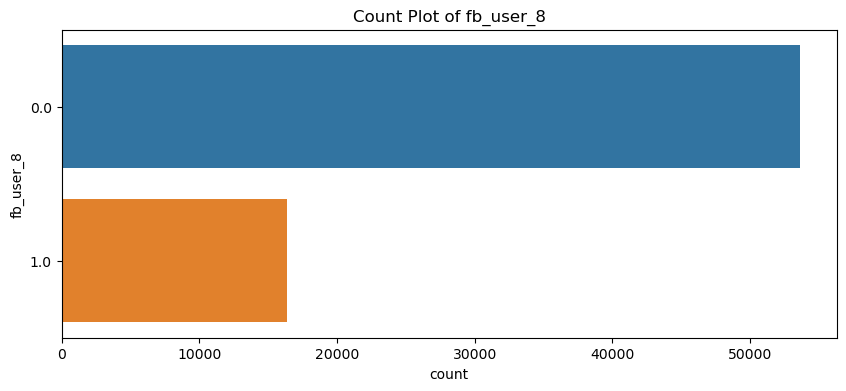

Column: month_present_7, Missing Data: 0.00%


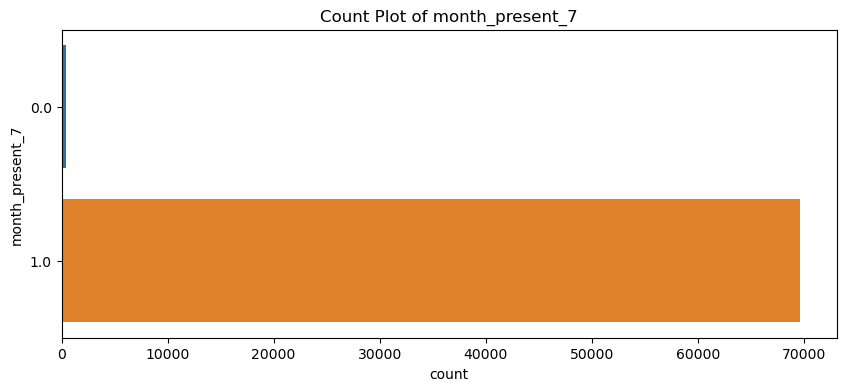

Column: month_present_8, Missing Data: 0.00%


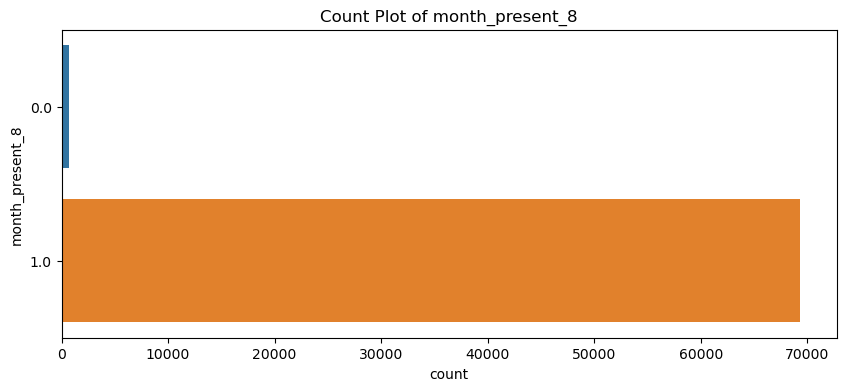

In [31]:
def univariate_analysis(df, column_list, plot_type='numerical'):
    """
    Perform univariate analysis for the specified columns in the DataFrame.

    Parameters:
    - df: DataFrame, the DataFrame containing the data.
    - column_list: list, a list of column names to perform analysis on.
    - plot_type: str, optional, the type of plot to generate, either 'numerical' for numerical columns
                 or 'categorical' for categorical columns. Default is 'numerical'.
    """
    for column in column_list:
        if column not in df.columns:
            print(f"Column {column} not found in dataframe.")
            continue

        # Calculate the percentage of missing data in the column
        missing_percentage = df[column].isna().sum() / len(df) * 100
        print(f"Column: {column}, Missing Data: {missing_percentage:.2f}%")

        # Proceed with plotting if missing data percentage is less than 30%
        if missing_percentage < 30:
            plt.figure(figsize=(10, 4))
            if plot_type == 'numerical':
                # Plot distribution and box plot for numerical data
                plt.subplot(1, 2, 1)
                sns.histplot(df[column].dropna(), kde=True)
                plt.title(f'Distribution of {column}')

                plt.subplot(1, 2, 2)
                sns.boxplot(y=df[column].dropna())
                plt.title(f'Box Plot of {column}')
            elif plot_type == 'categorical':
                # Plot count plot for categorical data
                sns.countplot(y=df[column].dropna())
                plt.title(f'Count Plot of {column}')
            
            plt.show()
        else:
            # Skip plotting if missing data percentage is high
            print(f"Skipping {column} due to high percentage of missing data.")
            
# Perform univariate analysis for numerical columns
univariate_analysis(df_refined_1, numeric_cols, plot_type='numerical')

# Perform univariate analysis for categorical columns
univariate_analysis(df_refined_1, categorical_cols, plot_type='categorical')

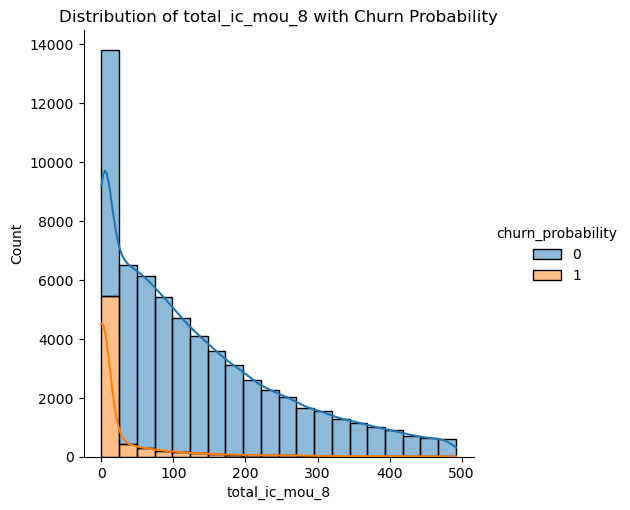

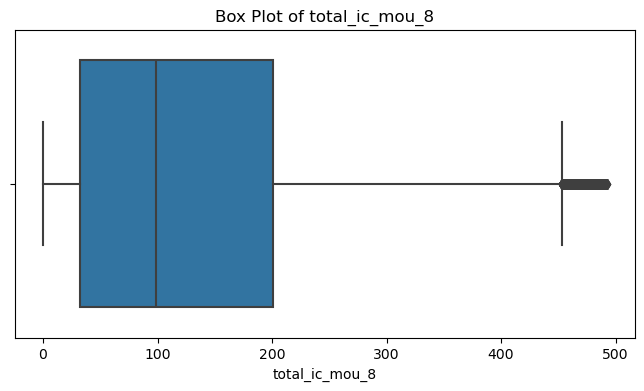

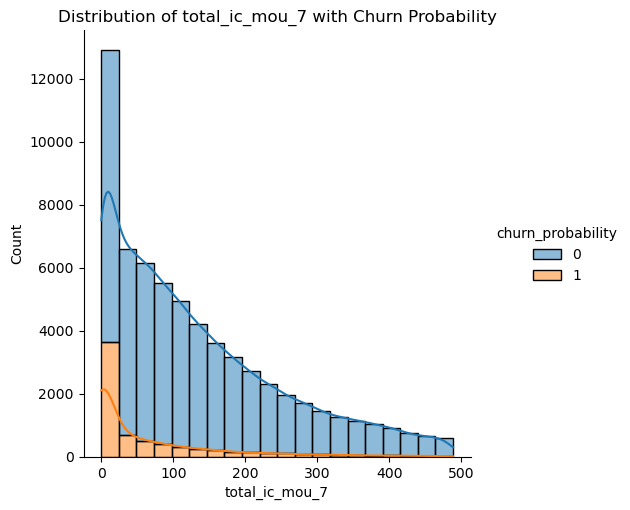

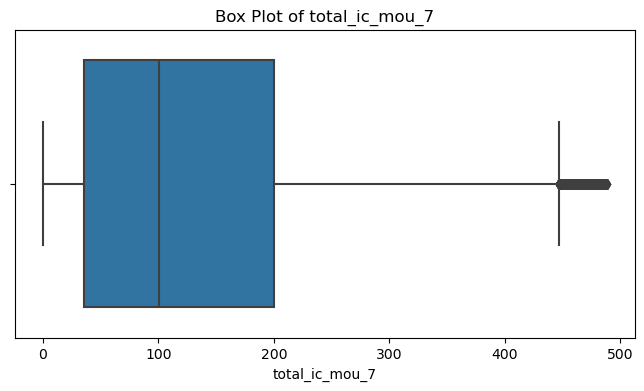

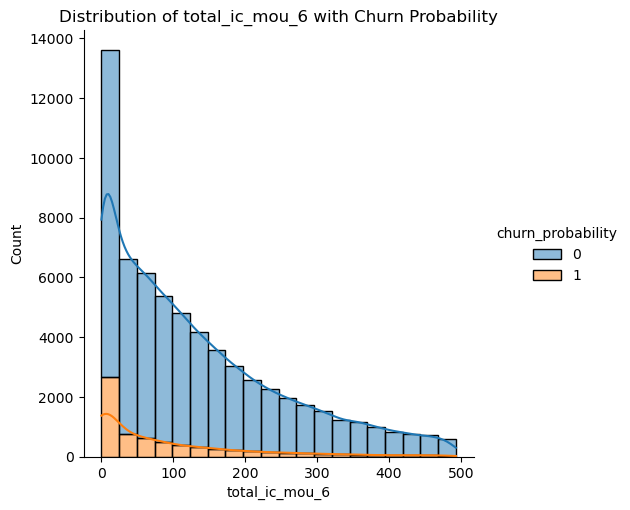

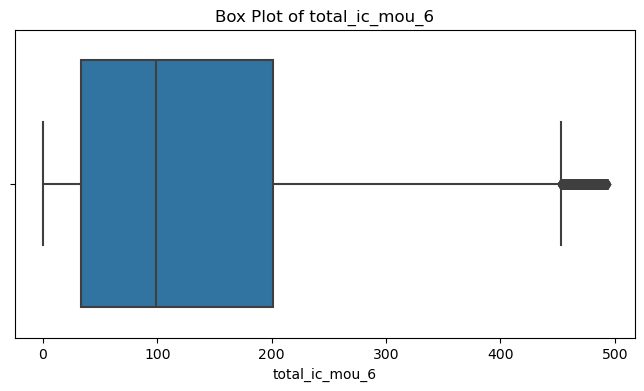

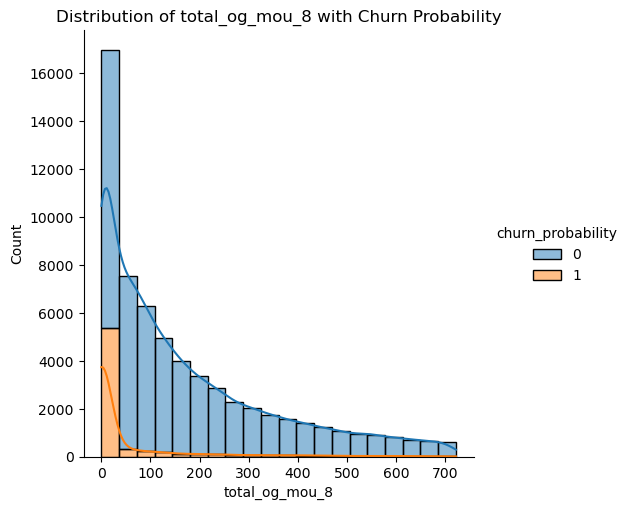

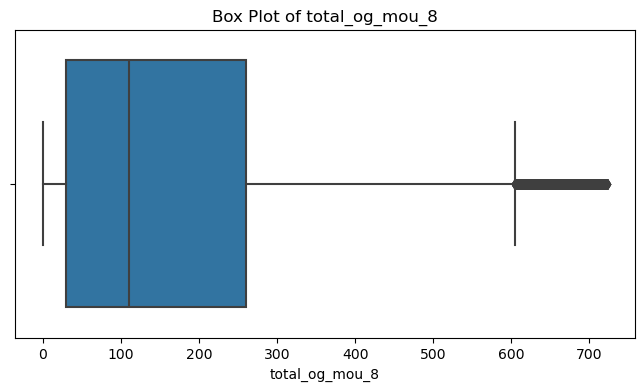

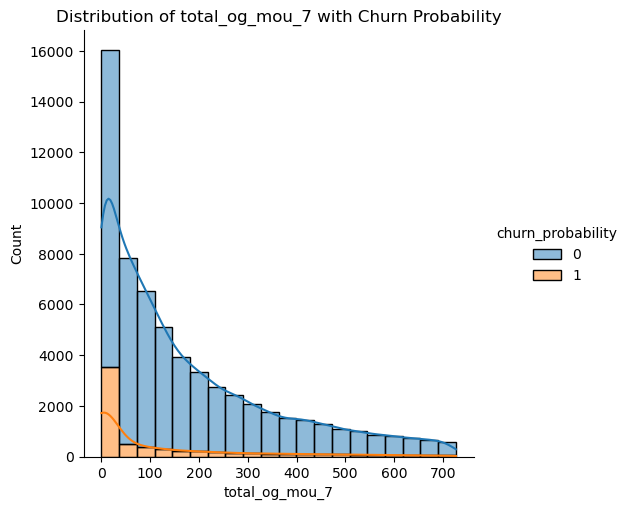

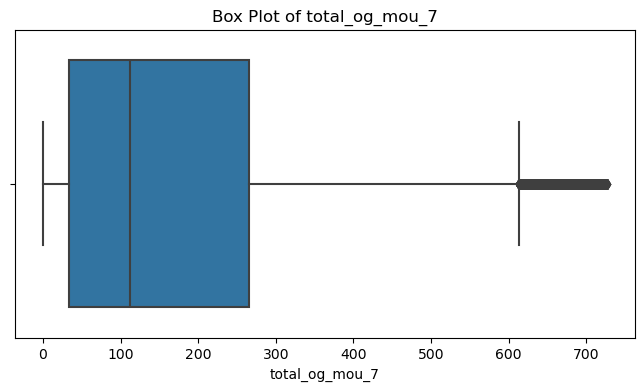

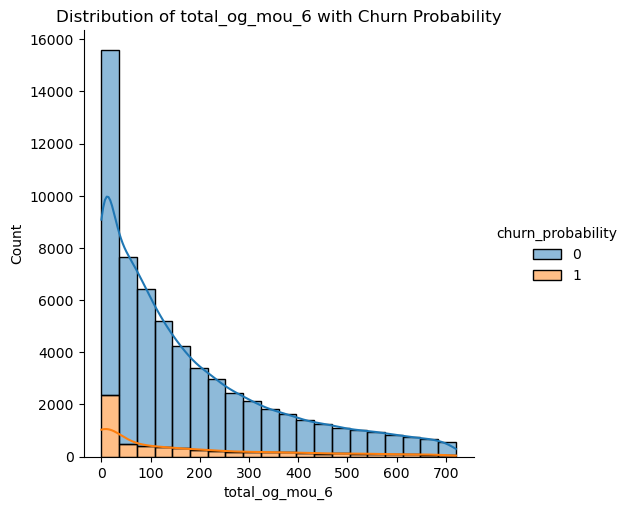

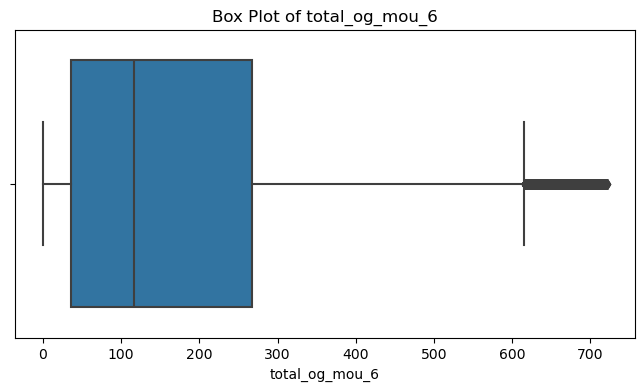

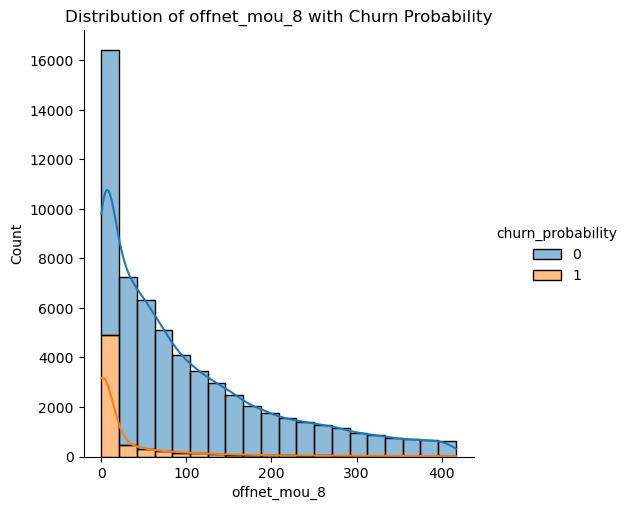

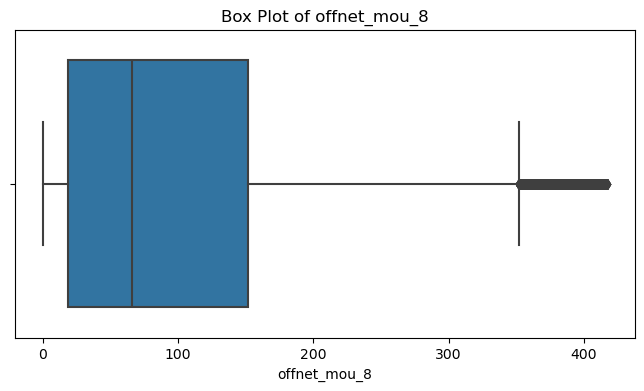

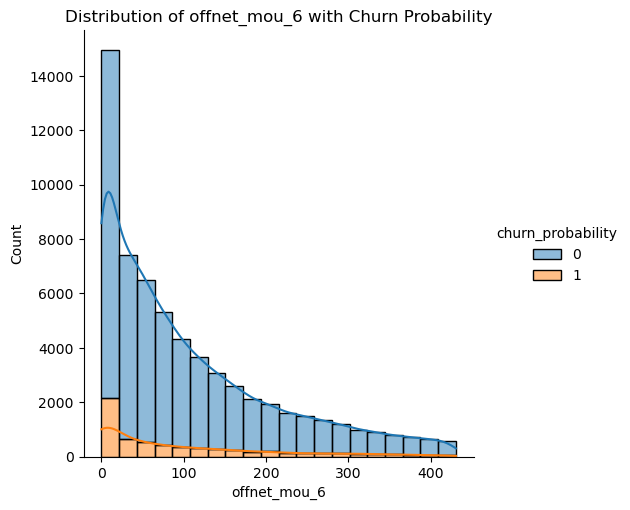

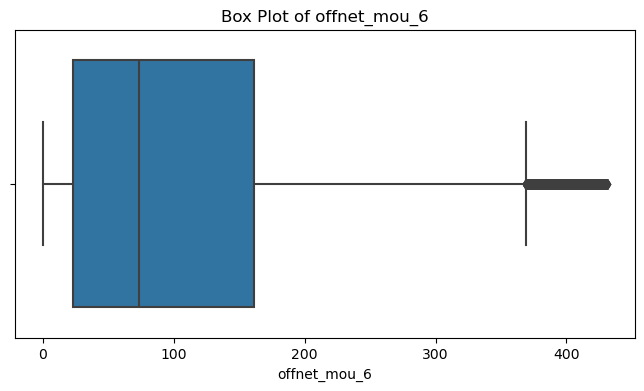

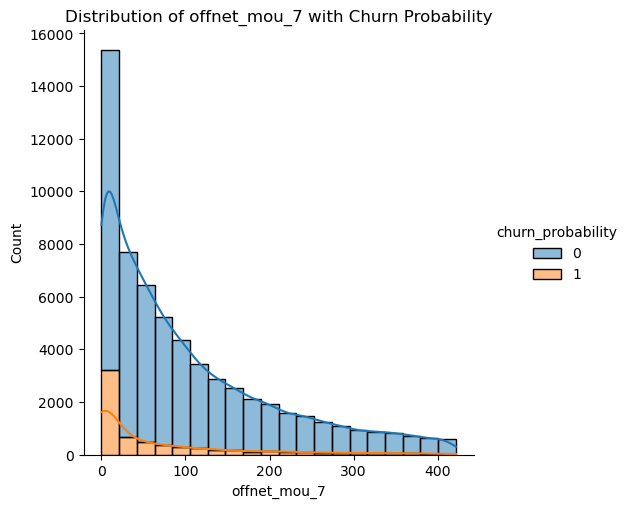

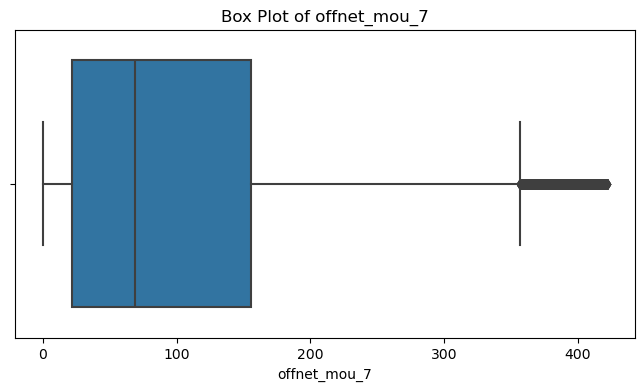

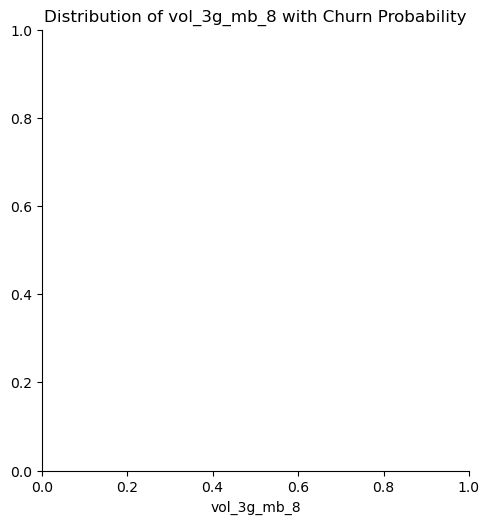

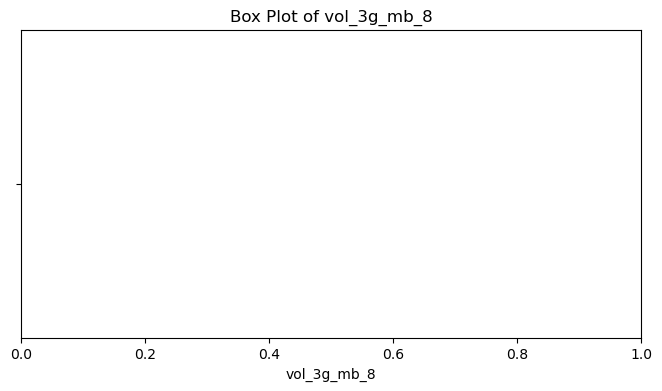

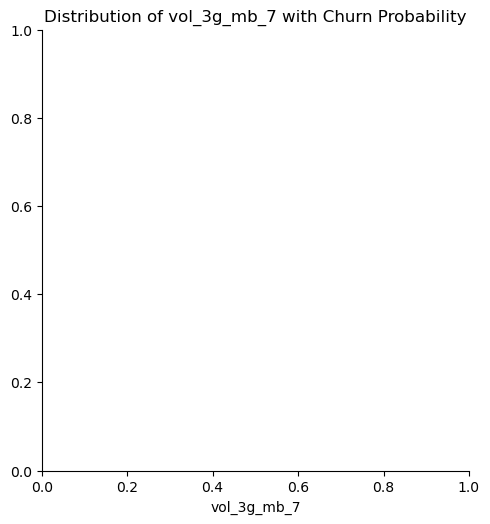

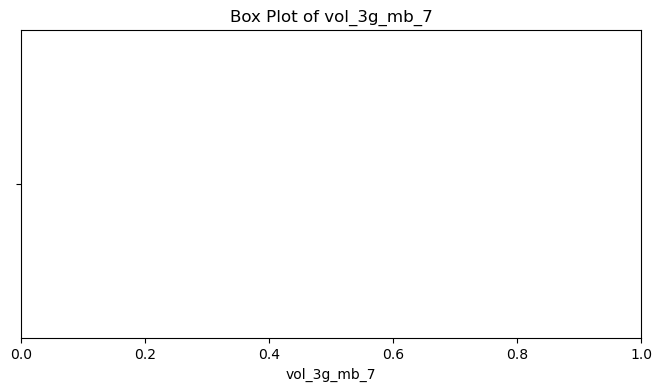

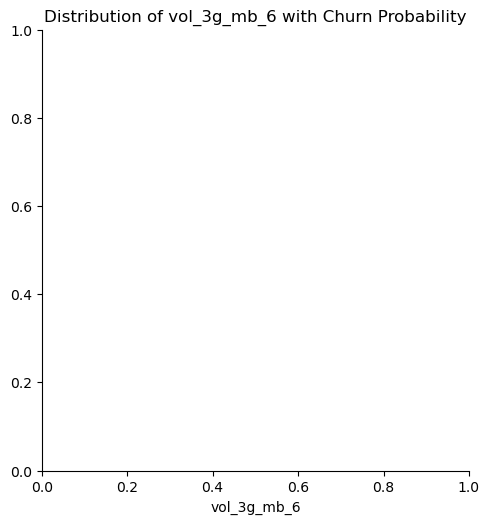

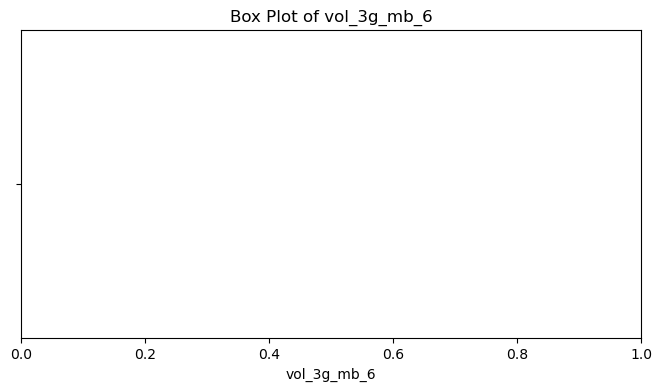

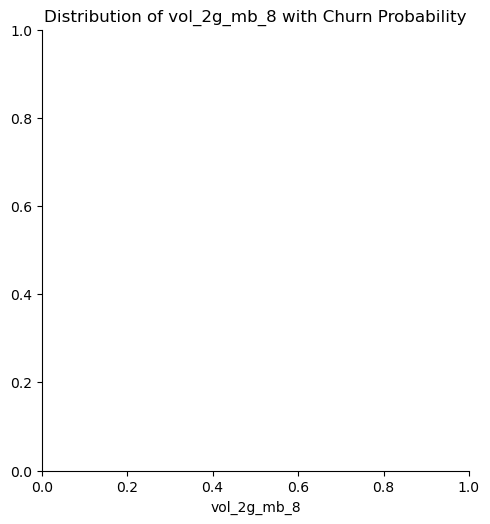

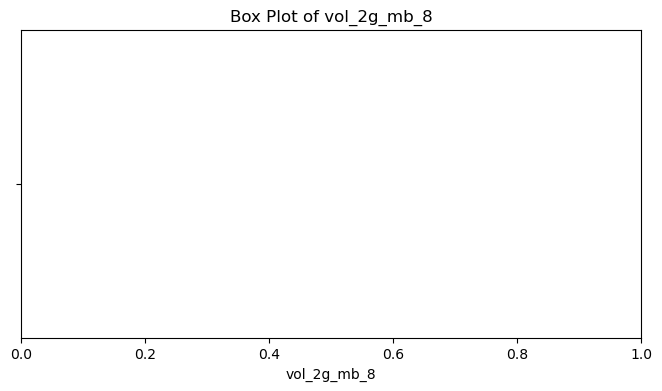

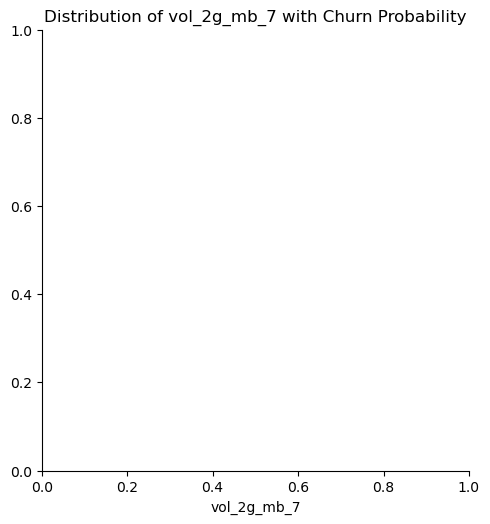

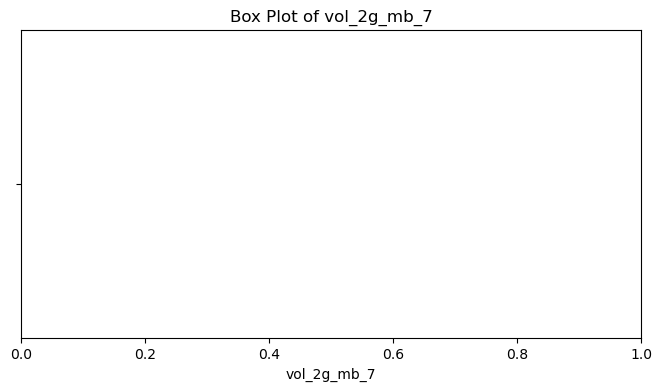

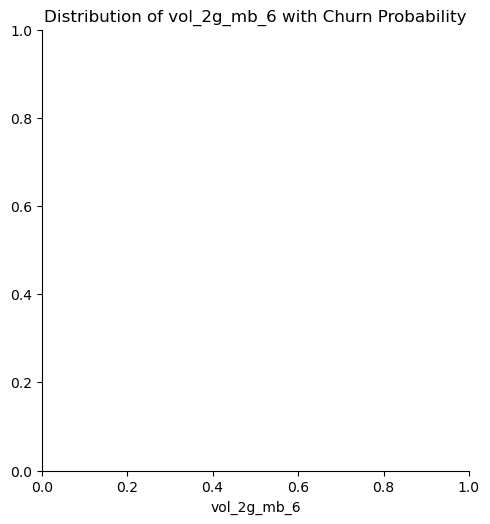

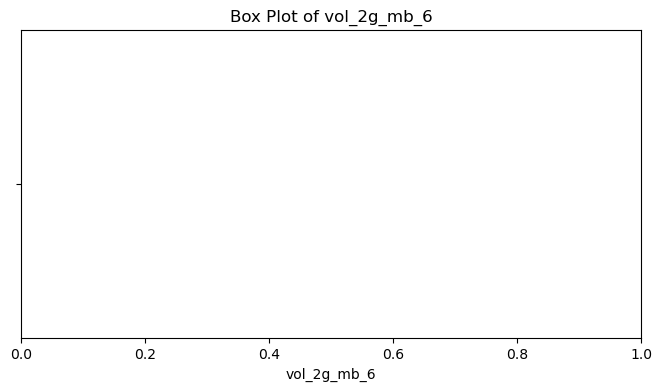

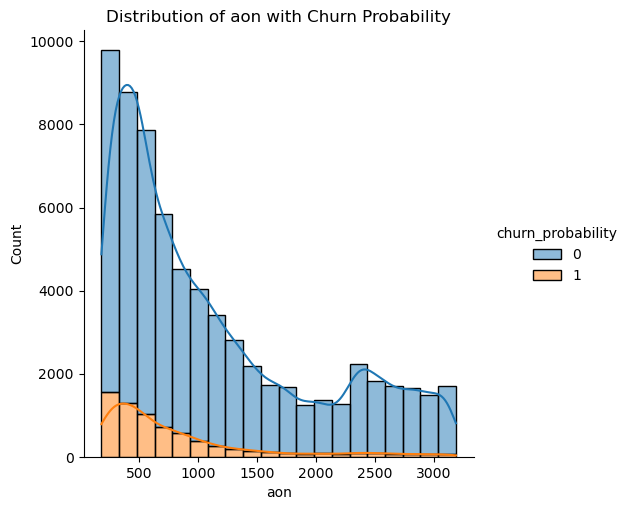

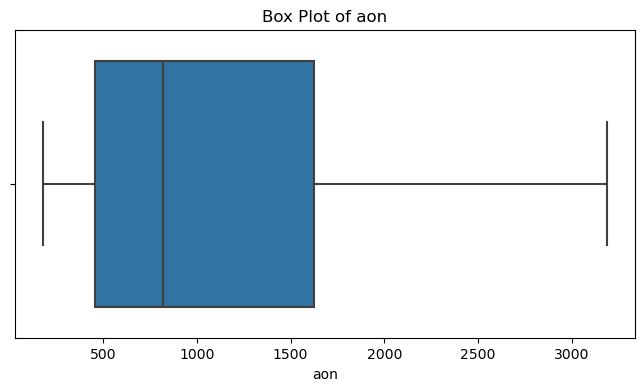

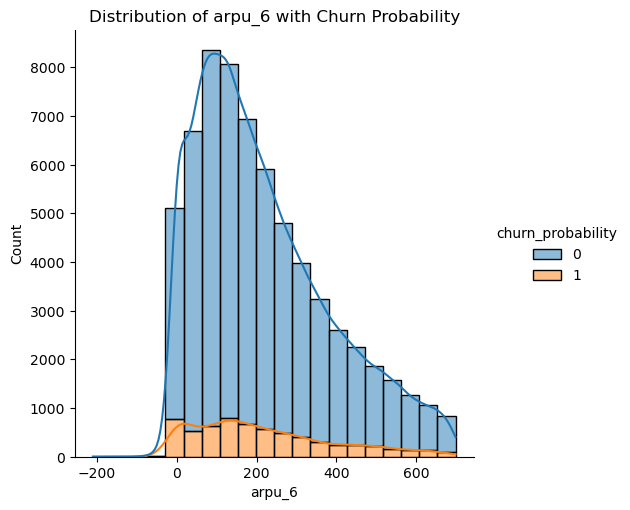

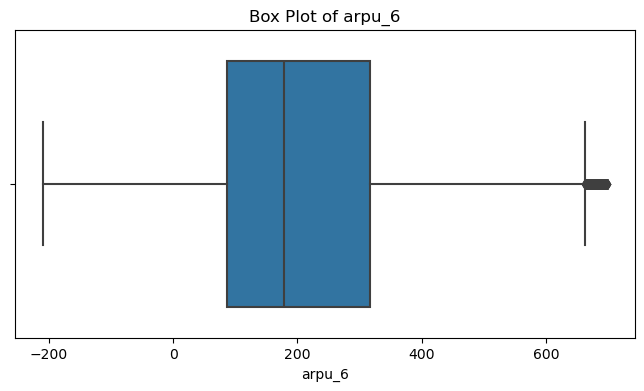

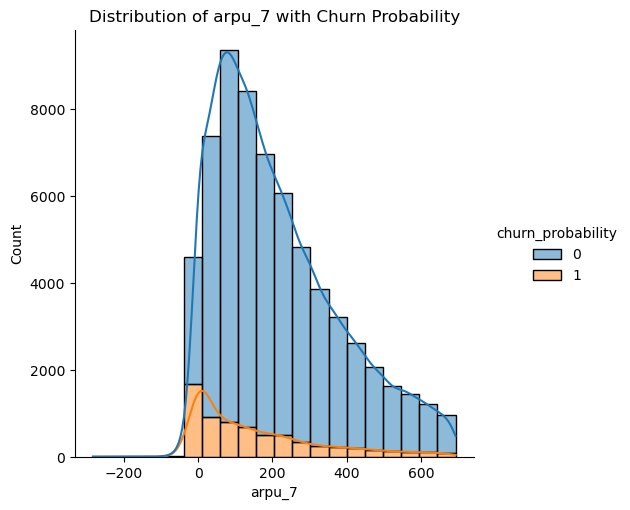

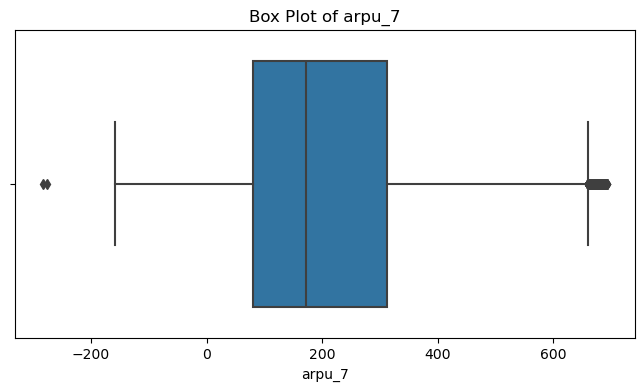

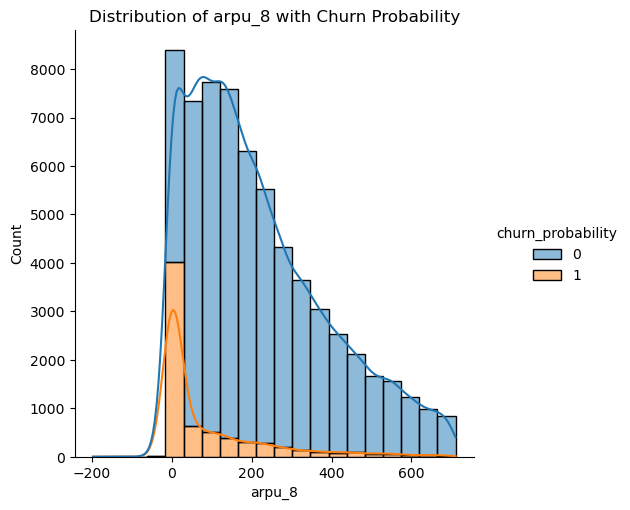

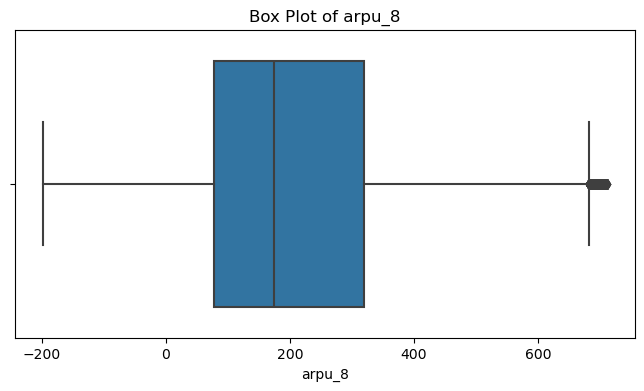

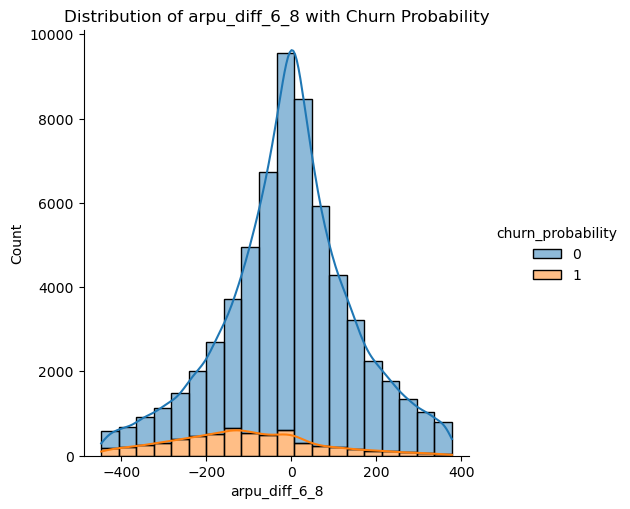

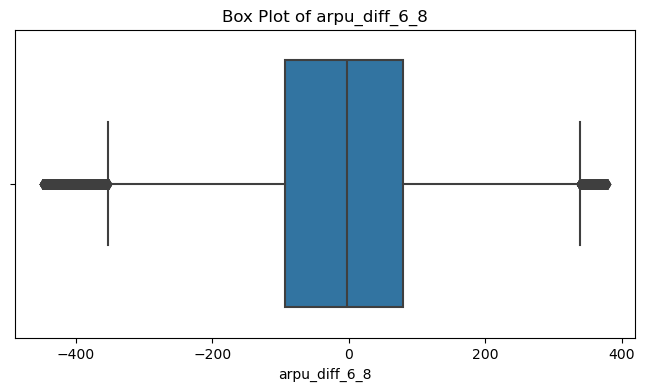

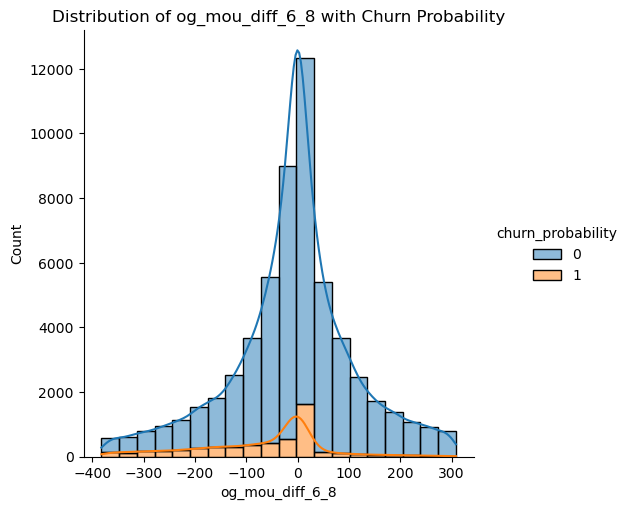

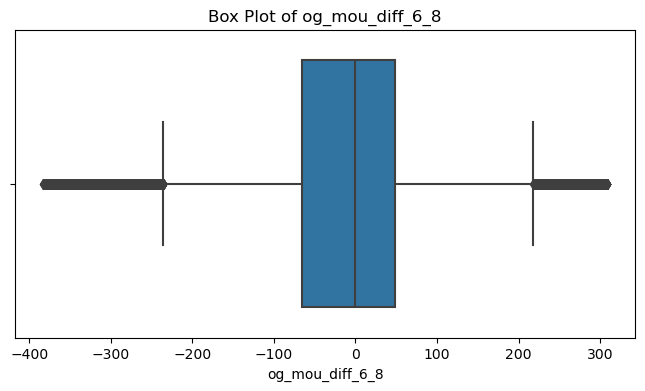

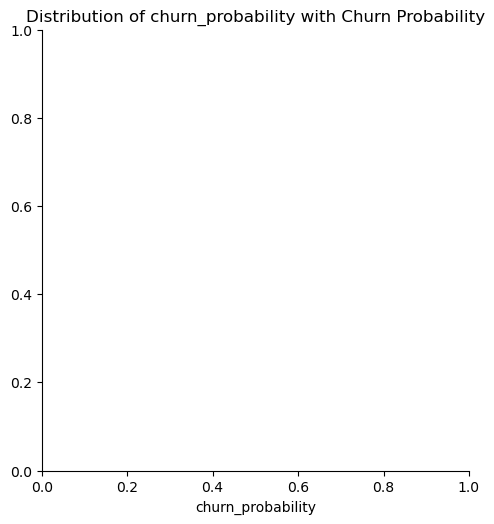

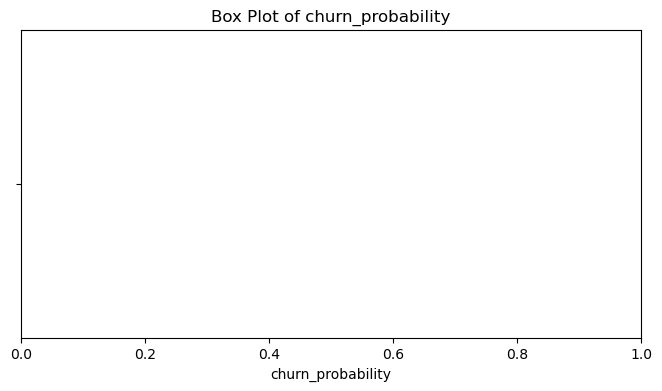

In [32]:
# Iterating over numerical columns for outlier analysis
for column_name in numeric_cols:
    arr = np.array(df_refined_1[column_name])
    uq = np.percentile(arr, 70)
    lq = np.percentile(arr, 20)
    iqr = uq - lq
    ul = uq + (1.5 * iqr)
    ll = lq - (1.5 * iqr)
    
    # Filtering data within upper and lower bounds
    filtered_data = df_refined_1[(df_refined_1[column_name] < ul) & (df_refined_1[column_name] > ll)]
    
    # Plotting distribution of filtered data with hue based on churn probability
    sns.displot(data=filtered_data, x=column_name, kde=True, hue='churn_probability', multiple='stack', bins=20)
    plt.xlabel(column_name)
    plt.title(f'Distribution of {column_name} with Churn Probability')
    plt.show()
    
    # Plotting boxplot to identify outliers
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=column_name, data=filtered_data)
    plt.xlabel(column_name)
    plt.title(f'Box Plot of {column_name}')
    plt.show()

Multivariatr Analysis

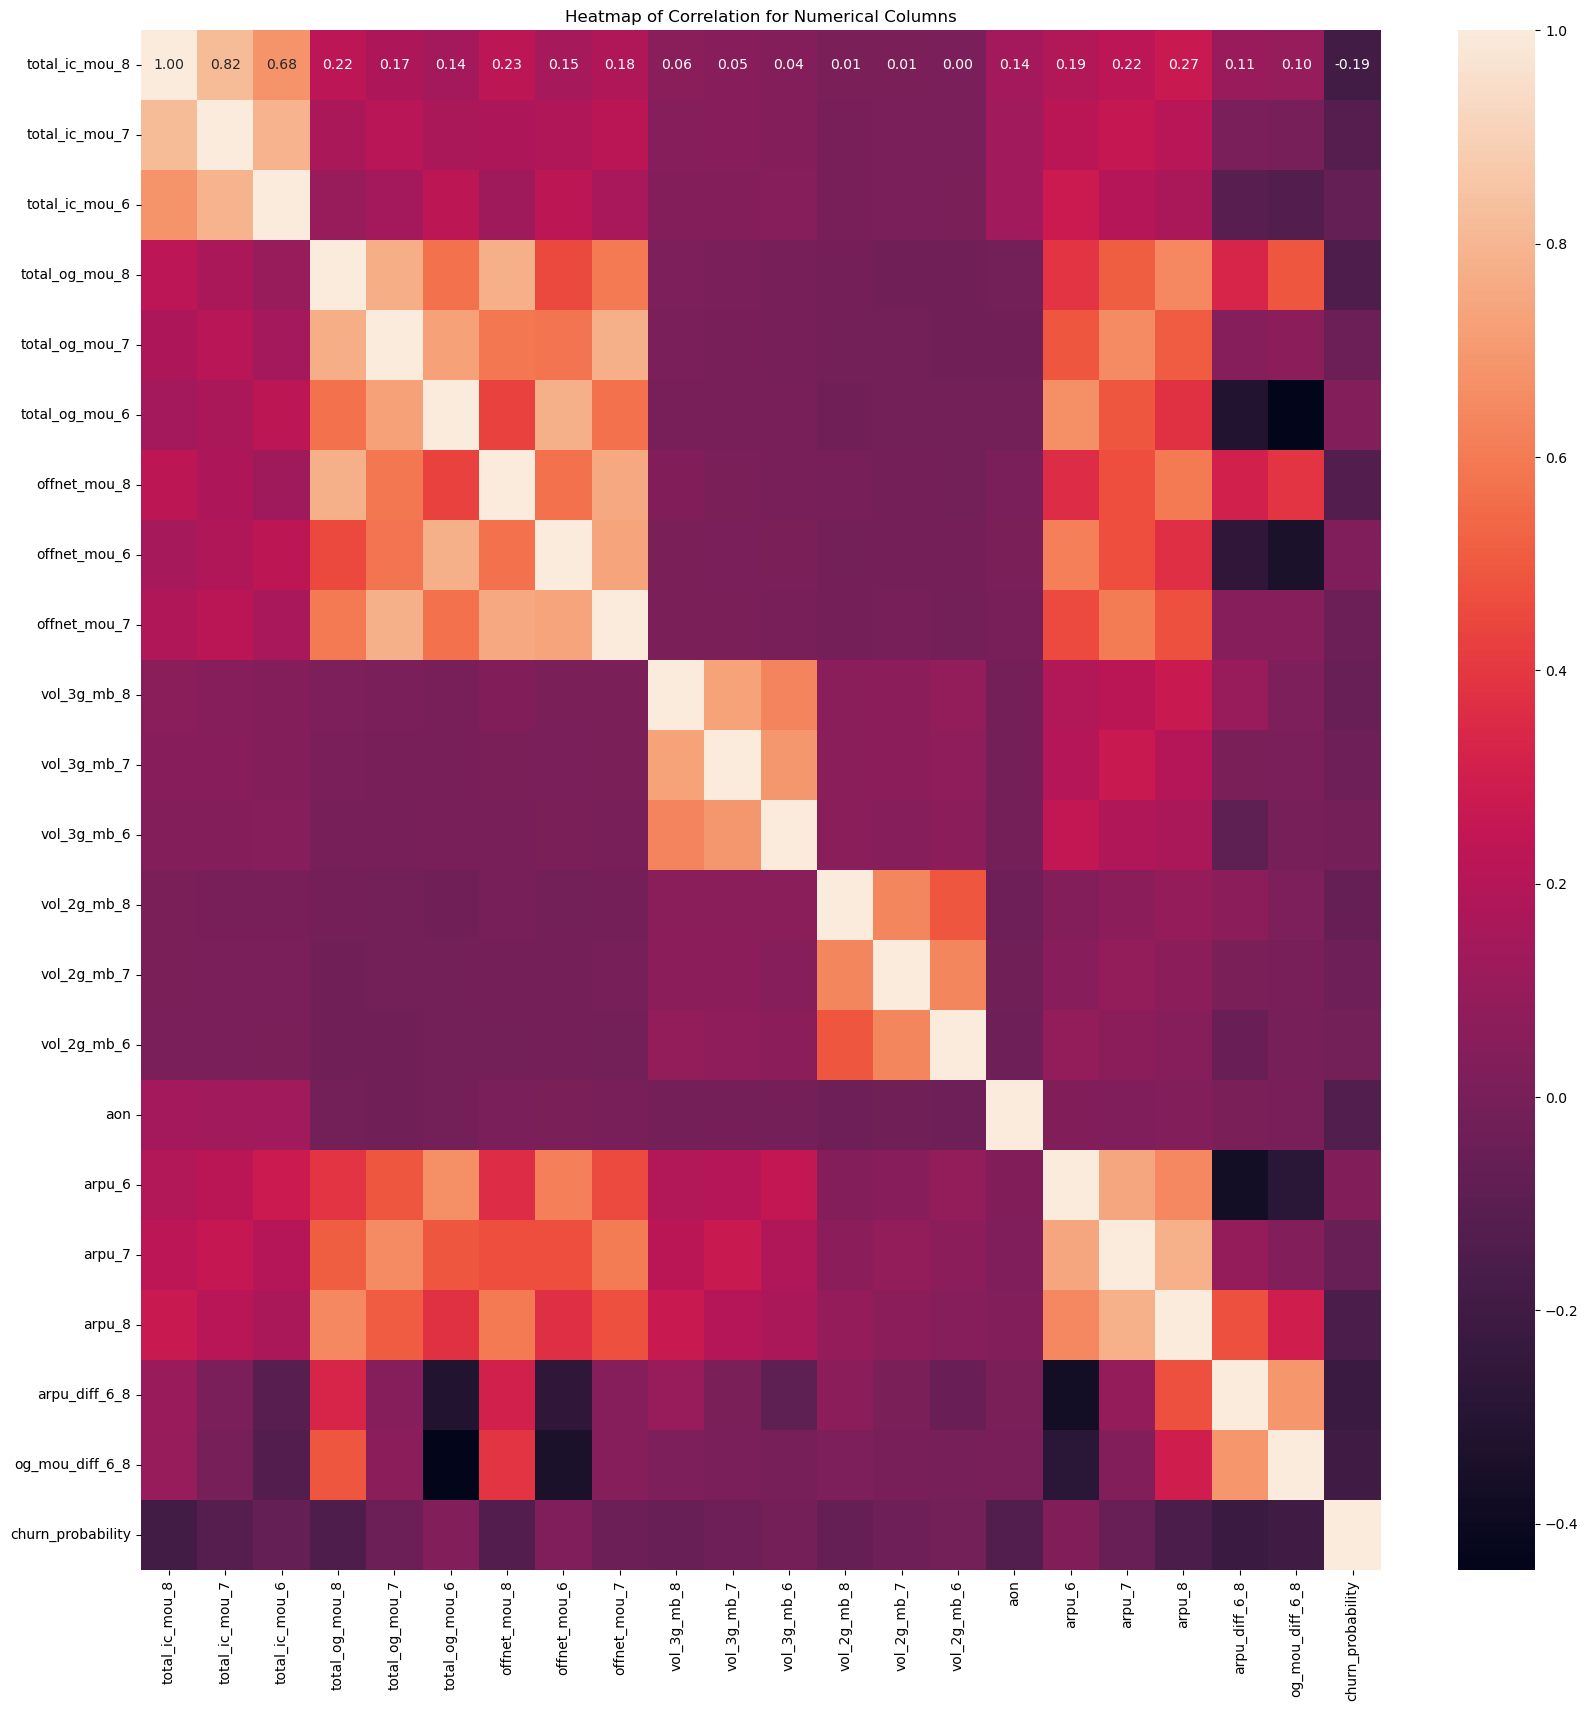

In [33]:
# Plotting a heatmap to visualize correlations between numerical columns
#df.corr takes only numerical and float value.
plt.figure(figsize=(20, 20))  # Set the figure size
sns.heatmap(df_refined_1[numeric_cols].corr(), annot=True, fmt='.2f')  # Plot heatmap with correlation values annotated
plt.title("Heatmap of Correlation for Numerical Columns")  # Set the title of the plot
plt.show()  # Show the plot

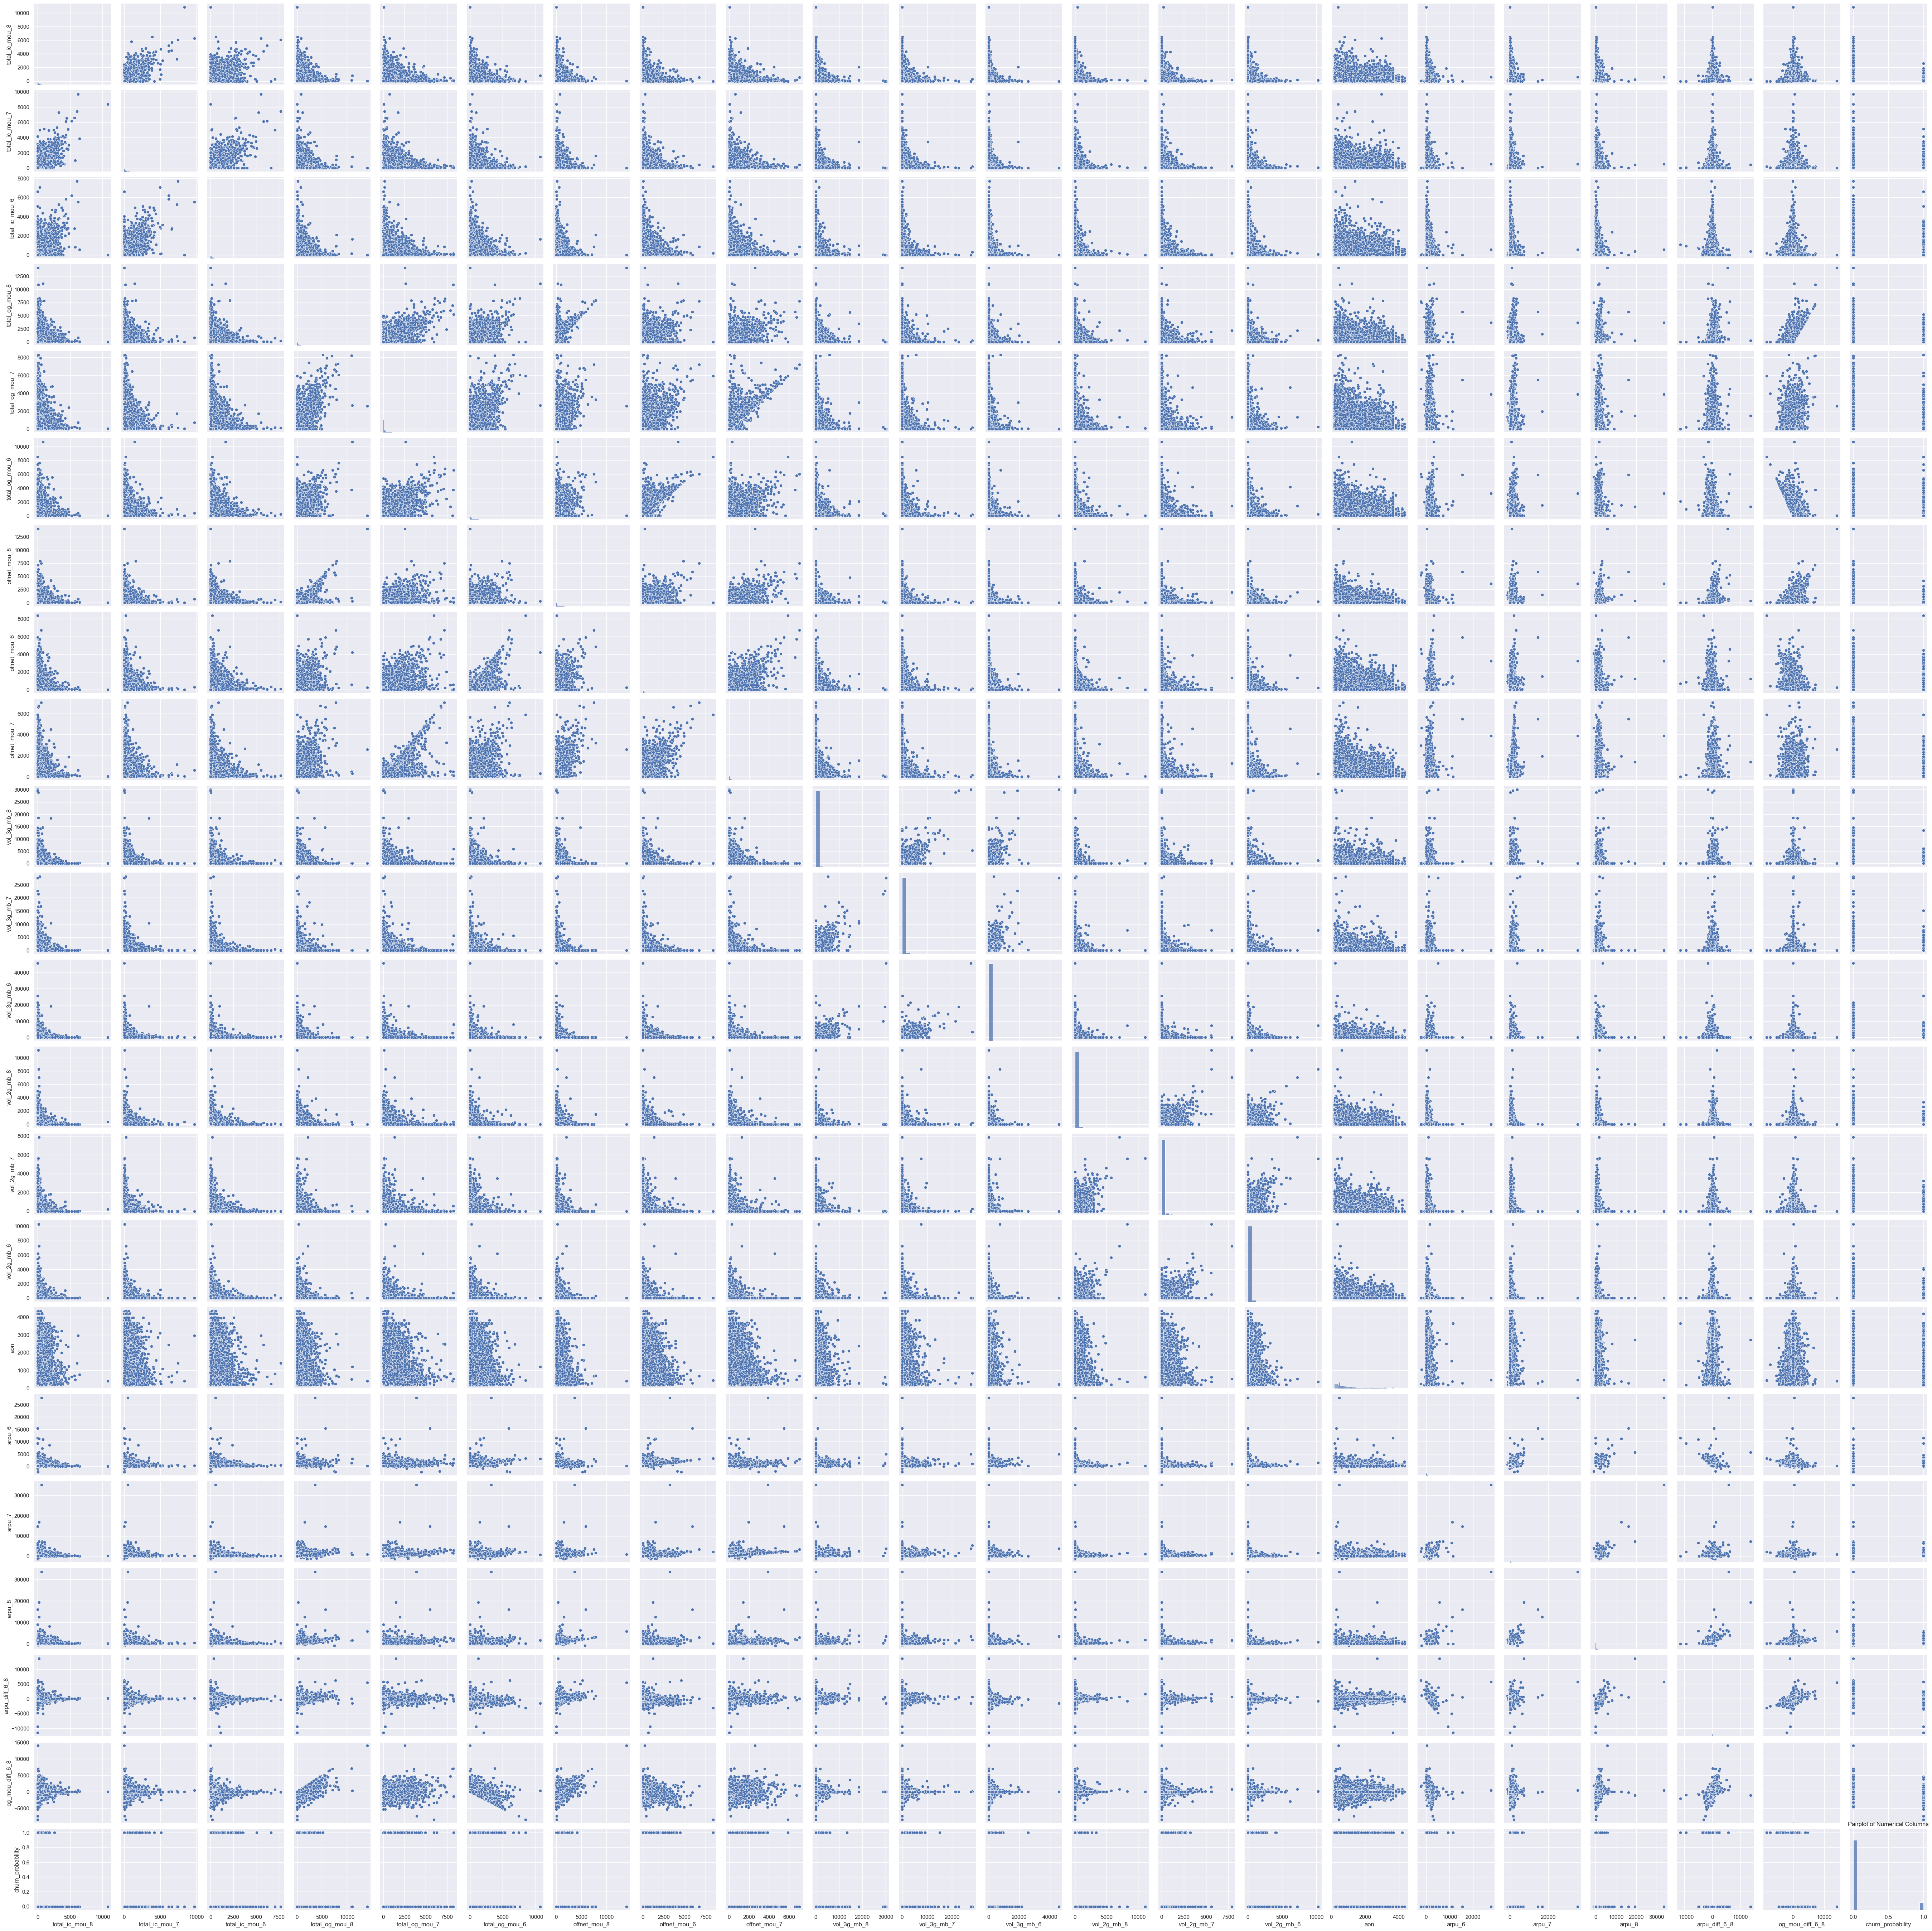

In [34]:
# Creating pairplots to visualize relationships between numerical columns
sns.set()  # Set seaborn style
sns.pairplot(data = df_refined_1, vars = numeric_cols, height=2.5)  # Plot pairplots for numerical columns
plt.title("Pairplot of Numerical Columns")  # Set the title of the plot
plt.show()  # Show the plot

Model Building

In [35]:
!pip install xgboost

In [36]:
!pip install catboost

In [37]:
# # Importing necessary libraries for data preprocessing, model selection, evaluation metrics, and machine learning algorithms.
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, auc, roc_curve, confusion_matrix, f1_score

In [38]:
# Splitting the DataFrame into features (X) and target variable (y)
y = df_refined_1.pop('churn_probability')  # Extracting 'churn_probability' column as target variable
X = df_refined_1  # Features without 'churn_probability' column

In [39]:
X = df_refined_1

In [40]:
X = X[X.select_dtypes(include=['float64','int64']).columns]

In [41]:
#Scaling the df:
scaler=MinMaxScaler() # it just sets minimum and maximum value
X_scaled=scaler.fit_transform(X)
X_data=pd.DataFrame(X_scaled)
X_data.columns=X.columns
X_data

loc_og_t2t_mou_8  loc_ic_t2t_mou_8  loc_ic_mou_8  loc_og_t2f_mou_8  \
0              0.000026          0.000728      0.002282          0.000000   
1              0.000000          0.000984      0.002311          0.000000   
2              0.000000          0.000607      0.002771          0.000000   
3              0.000000          0.002233      0.007482          0.000000   
4              0.000570          0.000249      0.002614          0.008516   
...                 ...               ...           ...               ...   
69994          0.000669          0.003164      0.023800          0.000000   
69995          0.000843          0.002159      0.004791          0.000000   
69996          0.007295          0.008090      0.038043          0.213466   
69997          0.000624          0.000097      0.000721          0.004862   
69998          0.000000          0.000090      0.003016          0.000000   

       loc_ic_t2f_mou_8  loc_og_t2c_mou_8  loc_ic_t2m_mou_8  loc_og_mou_8  \
0              0.000000          0.000000          0.002695      0.000236   
1              0.002028          0.084672          0.001768      0.000000   
2              0.000000          0.000000          0.003747      0.000000   
3              0.000000          0.022824          0.009107      0.002140   
4              0.003662          0.000000          0.003106      0.001428   
...                 ...               ...               ...           ...   
69994          0.000000          0.002444          0.035687      0.008774   
69995          0.000000          0.000000          0.004589      0.005110   
69996          0.088120          0.000000          0.028327      0.031005   
69997          0.001676          0.000000          0.000628      0.001669   
69998          0.000000          0.000000          0.005051      0.000000   

       std_og_t2m_mou_8  og_others_8  ...    arpu_6  last_day_rch_amt_8  \
0              0.000000          0.0  ...  0.076359            0.000000   
1              0.000000          0.0  ...  0.075316            0.000000   
2              0.000000          0.0  ...  0.077343            0.000000   
3              0.000330          0.0  ...  0.080530            0.011238   
4              0.000000          0.0  ...  0.083342            0.006743   
...                 ...          ...  ...       ...                 ...   
69994          0.020799          0.0  ...  0.075841            0.029220   
69995          0.000038          0.0  ...  0.080654            0.009440   
69996          0.000000          0.0  ...  0.087723            0.010789   
69997          0.000061          0.0  ...  0.083271            0.000000   
69998          0.000000          0.0  ...  0.080927            0.000000   

       last_day_rch_amt_7  last_day_rch_amt_6  days_since_rechg_7  \
0                0.020968            0.016209            0.709677   
1                0.000000            0.000000            0.709677   
2                0.016129            0.017456            0.322581   
3                0.035484            0.027431            0.354839   
4                0.003226            0.006234            0.193548   
...                   ...                 ...                 ...   
69994            0.006452            0.012469            0.032258   
69995            0.009677            0.012469            0.032258   
69996            0.080645            0.069576            0.064516   
69997            0.000000            0.000000            0.419355   
69998            0.000000            0.049377            0.161290   

       days_since_rechg_8  month_present_7  month_present_8  arpu_diff_6_8  \
0                0.258065              1.0              1.0       0.457182   
1                0.193548              1.0              1.0       0.459838   
2                0.258065              1.0              1.0       0.455707   
3                0.225806              1.0              1.0       0.456326   
4                0.064516            

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 128 entries, loc_og_t2t_mou_8 to og_mou_diff_6_8
dtypes: float64(111), int64(17)
memory usage: 68.4 MB


In [43]:
# Splitting the dataset into training and testing subsets using train_test_split function.
# The features (X_data) and target variable (y) are split into X_train, X_test, y_train, and y_test respectively.
# The train_size parameter specifies the proportion of the dataset to include in the training set (70% in this case).
# The random_state parameter ensures reproducibility of results by fixing the random seed (set to 42).
X_train, X_test, y_train, y_test = train_test_split(X_data, y, train_size=0.7, random_state=42)

# Displaying the shapes of the training and testing subsets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48999, 128), (21000, 128), (48999,), (21000,))

In [44]:
# Importing RandomOverSampler from imbalanced-learn library to handle class imbalance.
from imblearn.over_sampling import RandomOverSampler

# Instantiating RandomOverSampler with sampling strategy of 1 (balance the classes).
os = RandomOverSampler(sampling_strategy=1)

# Resampling the training data to balance the classes.
X_train_resampled, y_train_resampled = os.fit_resample(X_train, np.array(y_train))

# Printing the shape of resampled training data and the percentage of positive class instances.
print(X_train_resampled.shape, y_train_resampled.shape)
print(f"Percentage of positive class instances after resampling: {y_train_resampled.sum() / len(y_train_resampled) * 100:.2f}%")

(88044, 128) (88044,)
Percentage of positive class instances after resampling: 50.00%


In [ ]:
# Adaboost classifier , catboost classifier, XGBClassifier

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END ......max_depth=5, n_estimators=20;, score=0.941 total time=   4.8s
[CV 2/3] END ......max_depth=5, n_estimators=20;, score=0.942 total time=   3.7s
[CV 3/3] END ......max_depth=5, n_estimators=20;, score=0.941 total time=   3.6s
[CV 1/3] END ......max_depth=5, n_estimators=30;, score=0.942 total time=   5.5s
[CV 2/3] END ......max_depth=5, n_estimators=30;, score=0.942 total time=   5.7s
[CV 3/3] END ......max_depth=5, n_estimators=30;, score=0.942 total time=   6.3s
[CV 1/3] END ......max_depth=5, n_estimators=50;, score=0.942 total time=   9.5s
[CV 2/3] END ......max_depth=5, n_estimators=50;, score=0.942 total time=  10.4s
[CV 3/3] END ......max_depth=5, n_estimators=50;, score=0.942 total time=   9.5s
[CV 1/3] END .....max_depth=10, n_estimators=20;, score=0.941 total time=   7.2s
[CV 2/3] END .....max_depth=10, n_estimators=20;, score=0.942 total time=   8.0s
[CV 3/3] END .....max_depth=10, n_estimators=20;,

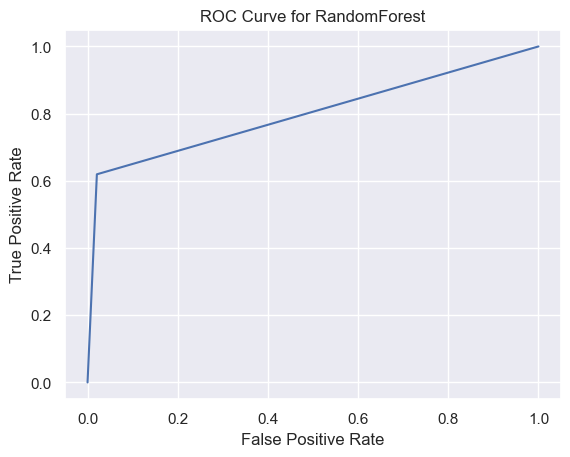

RandomForest :
Accuracy Score: 0.9423809523809524
Precision Score: 0.7739130434782608
AUC Score: 0.7993972072820217
F1 Score: 0.6881443298969072
Recall: 0.6194895591647331
Specificity: 0.9793048553993101
Confusion Matrix:
 [[18455   390]
 [  820  1335]]
__________________________________
Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END .......criterion=gini, max_depth=5;, score=0.939 total time=   2.4s
[CV 2/3] END .......criterion=gini, max_depth=5;, score=0.941 total time=   2.3s
[CV 3/3] END .......criterion=gini, max_depth=5;, score=0.940 total time=   2.5s
[CV 1/3] END ......criterion=gini, max_depth=10;, score=0.933 total time=   4.3s
[CV 2/3] END ......criterion=gini, max_depth=10;, score=0.931 total time=   4.7s
[CV 3/3] END ......criterion=gini, max_depth=10;, score=0.931 total time=   4.7s
[CV 1/3] END ......criterion=gini, max_depth=12;, score=0.929 total time=   5.2s
[CV 2/3] END ......criterion=gini, max_depth=12;, score=0.928 total time=   6.0s
[CV

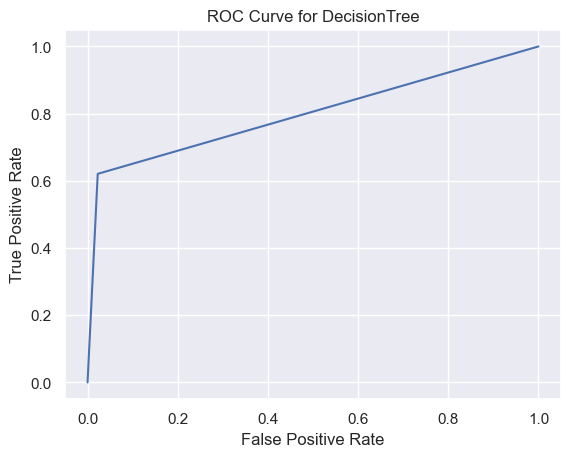

DecisionTree :
Accuracy Score: 0.9408095238095238
Precision Score: 0.7585034013605442
AUC Score: 0.7991381024464446
F1 Score: 0.6828272518499617
Recall: 0.6208816705336427
Specificity: 0.9773945343592465
Confusion Matrix:
 [[18419   426]
 [  817  1338]]
__________________________________
Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END learning_rate=0.1, n_estimators=20;, score=0.940 total time=  38.9s
[CV 2/3] END learning_rate=0.1, n_estimators=20;, score=0.942 total time=  26.4s
[CV 3/3] END learning_rate=0.1, n_estimators=20;, score=0.941 total time=  27.3s
[CV 1/3] END learning_rate=0.1, n_estimators=50;, score=0.941 total time= 1.1min
[CV 2/3] END learning_rate=0.1, n_estimators=50;, score=0.943 total time= 1.2min
[CV 3/3] END learning_rate=0.1, n_estimators=50;, score=0.942 total time= 1.2min
[CV 1/3] END learning_rate=0.01, n_estimators=20;, score=0.898 total time=  27.7s
[CV 2/3] END learning_rate=0.01, n_estimators=20;, score=0.898 total time=  26.8s
[

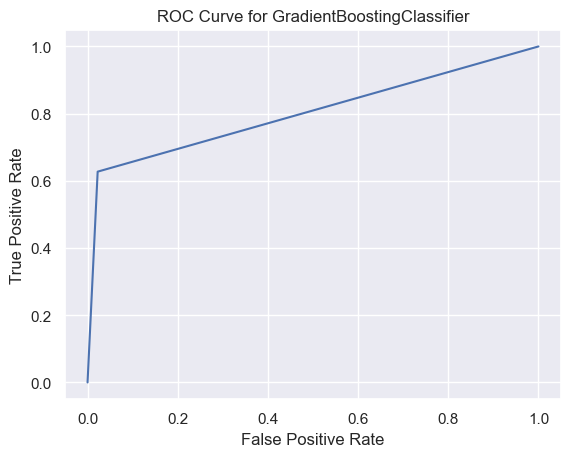

GradientBoostingClassifier :
Accuracy Score: 0.9416190476190476
Precision Score: 0.7616901408450705
AUC Score: 0.802465959017236
F1 Score: 0.6880407124681934
Recall: 0.6273781902552205
Specificity: 0.9775537277792518
Confusion Matrix:
 [[18422   423]
 [  803  1352]]
__________________________________
Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END .................C=0.1, penalty=l2;, score=0.910 total time=   0.8s
[CV 2/3] END .................C=0.1, penalty=l2;, score=0.912 total time=   0.7s
[CV 3/3] END .................C=0.1, penalty=l2;, score=0.913 total time=   0.7s
[CV 1/3] END ...........C=0.1, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/3] END ...........C=0.1, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/3] END ...........C=0.1, penalty=elasticnet;, score=nan total time=   0.0s
[CV 1/3] END .................C=0.5, penalty=l2;, score=0.913 total time=   1.0s
[CV 2/3] END .................C=0.5, penalty=l2;, score=0.914 total tim

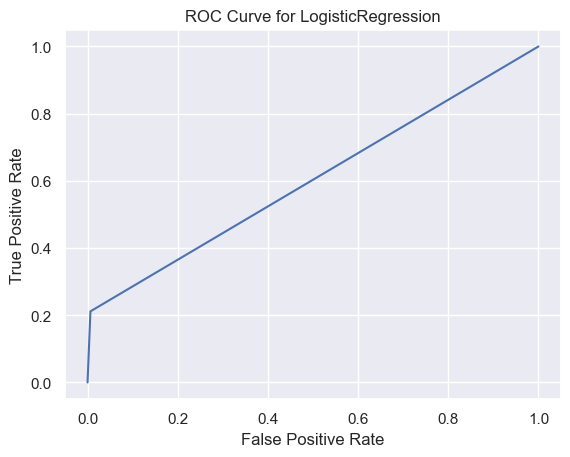

LogisticRegression :
Accuracy Score: 0.9133333333333333
Precision Score: 0.7902946273830156
AUC Score: 0.6025900634003493
F1 Score: 0.33382137628111275
Recall: 0.21160092807424594
Specificity: 0.9935791987264526
Confusion Matrix:
 [[18724   121]
 [ 1699   456]]
__________________________________


In [46]:
# Dictionary containing models and their corresponding hyperparameters for model building
models = {
    'RandomForest': RandomForestClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'LogisticRegression': LogisticRegression()
}

# Dictionary containing hyperparameters for each model
params = {
    'RandomForest': {'n_estimators': [20, 30, 50], 'max_depth': [5, 10, 12]},
    'DecisionTree': {'criterion': ["gini", "entropy"], 'max_depth': [5, 10, 12]},
    'GradientBoostingClassifier': {'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [20, 50]},
    'LogisticRegression': {'penalty': ['l2', 'elasticnet'], 'C': [0.1, 0.5, 1]}
}
# Dictionary to store model performance report
report = {}

# Loop over models for model training and evaluation
for model_name, model_obj in models.items():
    # GridSearchCV for hyperparameter tuning
    model_cv = GridSearchCV(estimator=model_obj, param_grid=params[model_name], scoring='accuracy', cv=3, verbose=3)
    model_cv.fit(X_train, y_train)
    
    # Best estimator from GridSearchCV
    model = model_cv.best_estimator_
    model.fit(X_train, y_train)  # Fit model on training data
    
    # Prediction on test data
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    score = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    score_auc = auc(fpr, tpr)
    confusion = confusion_matrix(y_test, y_pred)
    
    # Plot ROC curve
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.show()
    
    # Calculate recall and specificity
    TP = confusion[1, 1]  # True positive
    TN = confusion[0, 0]  # True negatives
    FP = confusion[0, 1]  # False positives
    FN = confusion[1, 0]  # False negatives
    recall = TP / float(TP + FN)
    specificity = TN / float(TN + FP)
    
    # Print model performance metrics
    print(model_name, ':')
    print('Accuracy Score:', score)
    print('Precision Score:', precision)
    print('AUC Score:', score_auc)
    print('F1 Score:', f1)
    print('Recall:', recall)
    print('Specificity:', specificity)
    print('Confusion Matrix:\n', confusion)
    print('__________________________________')
    
    # Store model and its performance in report dictionary
    report[model_name] = (model, score)

In [48]:
# applying PCA for dimensionality reduction

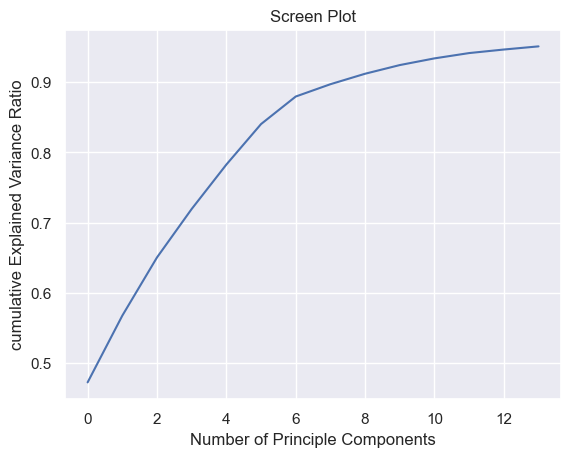

In [51]:
# Importing PCA(Principle Component Analysis)
from sklearn.decomposition import PCA

#Initialiing PCA with random_state set to 42 and specifing n_components to optimize memory usage
pca = PCA(n_components=0.95, random_state=42)

# Fitting PCA on training data and transforming it
X_train_transformed = pca.fit_transform(X_train)

# plotting the screen plot to visualize explained variance ratio of principle components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principle Components')
plt.ylabel('cumulative Explained Variance Ratio')
plt.title('Screen Plot')
plt.show()

In [54]:
# Finding the best model from the report based on accuracy
final_model = max(report.items(), key=lambda x: x[1][1])[1][0]

In [55]:
final_model

RandomForestClassifier(max_depth=5, n_estimators=50)